In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import Lasso, Ridge

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [ ]:
file_path_solar_1 = "C:\\Users\\tirth\\Downloads\\Renewable Energy\\Project\\Datasets\\Solar\\Solar Power Plant Data Q1.csv"
df_solar_1 = pd.read_csv(file_path_solar_1)
file_path_solar_2 = "C:\\Users\\tirth\\Downloads\\Renewable Energy\\Project\\Datasets\\Solar\\Solar Power Plant Data Q2.csv"
df_solar_2 = pd.read_csv(file_path_solar_2)
file_path_solar_3 = "C:\\Users\\tirth\\Downloads\\Renewable Energy\\Project\\Datasets\\Solar\\Solar Power Plant Data Q3.csv"
df_solar_3 = pd.read_csv(file_path_solar_3)
file_path_solar_4 = "C:\\Users\\tirth\\Downloads\\Renewable Energy\\Project\\Datasets\\Solar\\Solar Power Plant Data Q4.csv"
df_solar_4 = pd.read_csv(file_path_solar_4)

In [ ]:
df_solar_1['Date']=pd.to_datetime(df_solar_1['Date'],format="%d-%m-%Y")
df_solar_1['Hour(NMT)']=pd.to_datetime(df_solar_1['Hour(NMT)'],format="%H:%M:%S")
df_solar_1['MONTH']=df_solar_1['Date'].dt.month
df_solar_1['DAY']=df_solar_1['Date'].dt.day
df_solar_1['hour']=df_solar_1['Hour(NMT)'].dt.hour
df_solar_1 = df_solar_1.drop(['Date'],axis=1)
df_solar_1 = df_solar_1.drop(['Hour(NMT)'],axis=1)
df_solar_1.head()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,MONTH,DAY,hour
0,0.6,0,1003.8,-7.4,0.1,97,0.0,1,1,0
1,1.7,0,1003.5,-7.4,-0.2,98,0.0,1,1,1
2,0.6,0,1003.4,-6.7,-1.2,99,0.0,1,1,2
3,2.4,0,1003.3,-7.2,-1.3,99,0.0,1,1,3
4,4.0,0,1003.1,-6.3,3.6,67,0.0,1,1,4


In [ ]:
df_solar_2['Date']=pd.to_datetime(df_solar_2['Date'],format="%d-%m-%Y")
df_solar_2['Hour(NMT)']=pd.to_datetime(df_solar_2['Hour(NMT)'],format="%H:%M:%S")
df_solar_2['MONTH']=df_solar_2['Date'].dt.month
df_solar_2['DAY']=df_solar_2['Date'].dt.day
df_solar_2['hour']=df_solar_2['Hour(NMT)'].dt.hour
df_solar_2 = df_solar_2.drop(['Date'],axis=1)
df_solar_2 = df_solar_2.drop(['Hour(NMT)'],axis=1)
df_solar_2.head()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,MONTH,DAY,hour
0,2.7,0,1007.4,-5.8,3.8,98,0.0,4,1,0
1,1.7,0,1007.0,-5.9,3.8,99,0.0,4,1,1
2,2.5,0,1006.1,-5.7,3.6,98,0.0,4,1,2
3,1.9,0,1005.4,-4.8,4.0,97,0.0,4,1,3
4,1.0,0,1005.6,-6.2,3.9,98,0.0,4,1,4


In [ ]:
df_solar_3['Date']=pd.to_datetime(df_solar_3['Date'],format="%d-%m-%Y")
df_solar_3['Hour(NMT)']=pd.to_datetime(df_solar_3['Hour(NMT)'],format="%H:%M:%S")
df_solar_3['MONTH']=df_solar_3['Date'].dt.month
df_solar_3['DAY']=df_solar_3['Date'].dt.day
df_solar_3['hour']=df_solar_3['Hour(NMT)'].dt.hour
df_solar_3 = df_solar_3.drop(['Date'],axis=1)
df_solar_3 = df_solar_3.drop(['Hour(NMT)'],axis=1)
df_solar_3.head()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,MONTH,DAY,hour
0,2.1,0,1007.1,-8.4,16.5,49,0.0,7,1,0
1,2.4,0,1007.4,-8.3,15.3,53,0.0,7,1,1
2,2.6,0,1007.4,-8.1,14.6,57,0.0,7,1,2
3,3.6,0,1007.2,-6.3,14.4,58,0.0,7,1,3
4,4.2,6,1006.9,7.2,15.1,57,0.0,7,1,4


In [ ]:
df_solar_4['Date']=pd.to_datetime(df_solar_4['Date'],format="%d-%m-%Y")
df_solar_4['Hour(NMT)']=pd.to_datetime(df_solar_4['Hour(NMT)'],format="%H:%M:%S")
df_solar_4['MONTH']=df_solar_4['Date'].dt.month
df_solar_4['DAY']=df_solar_4['Date'].dt.day
df_solar_4['hour']=df_solar_4['Hour(NMT)'].dt.hour
df_solar_4 = df_solar_4.drop(['Date'],axis=1)
df_solar_4 = df_solar_4.drop(['Hour(NMT)'],axis=1)
df_solar_4.head()

,WindSpeed,Sunshine,AirPressure,Radiation,AirTemperature,RelativeAirHumidity,SystemProduction,MONTH,DAY,hour
0,2.8,0,1023.5,-6.4,10.8,74,0.0,10,1,0
1,3.6,0,1023.3,-6.5,10.4,72,0.0,10,1,1
2,4.4,0,1022.8,-6.6,9.9,74,0.0,10,1,2
3,4.3,0,1022.2,-7.1,9.6,78,0.0,10,1,3
4,3.4,0,1021.8,-6.2,9.7,79,0.0,10,1,4


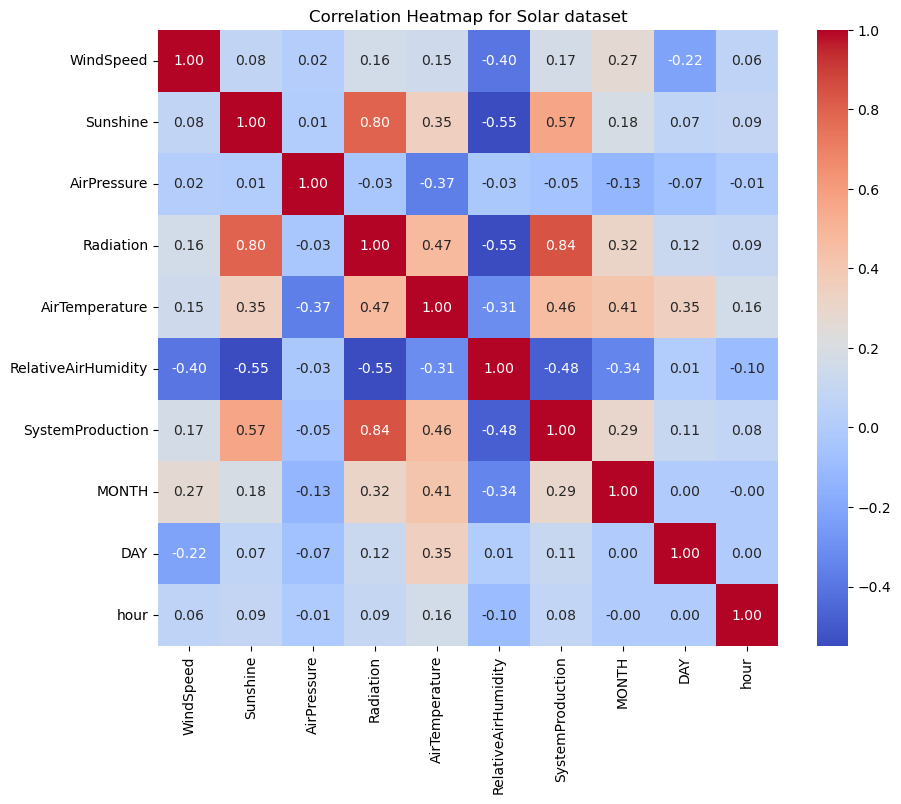

In [ ]:
# Heatmap for Solar dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df_solar_1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Solar dataset")
plt.show()

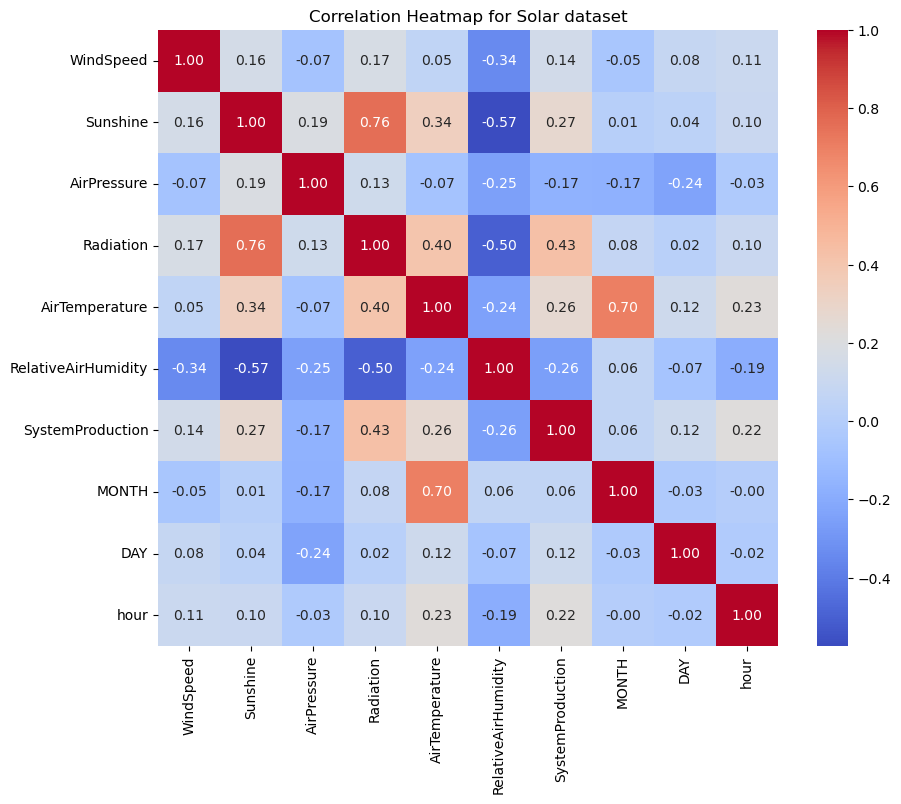

In [ ]:
df_solar_2 = remove_outliers(df_solar_2, 'SystemProduction')
# Heatmap for Solar dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df_solar_2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Solar dataset")
plt.show()

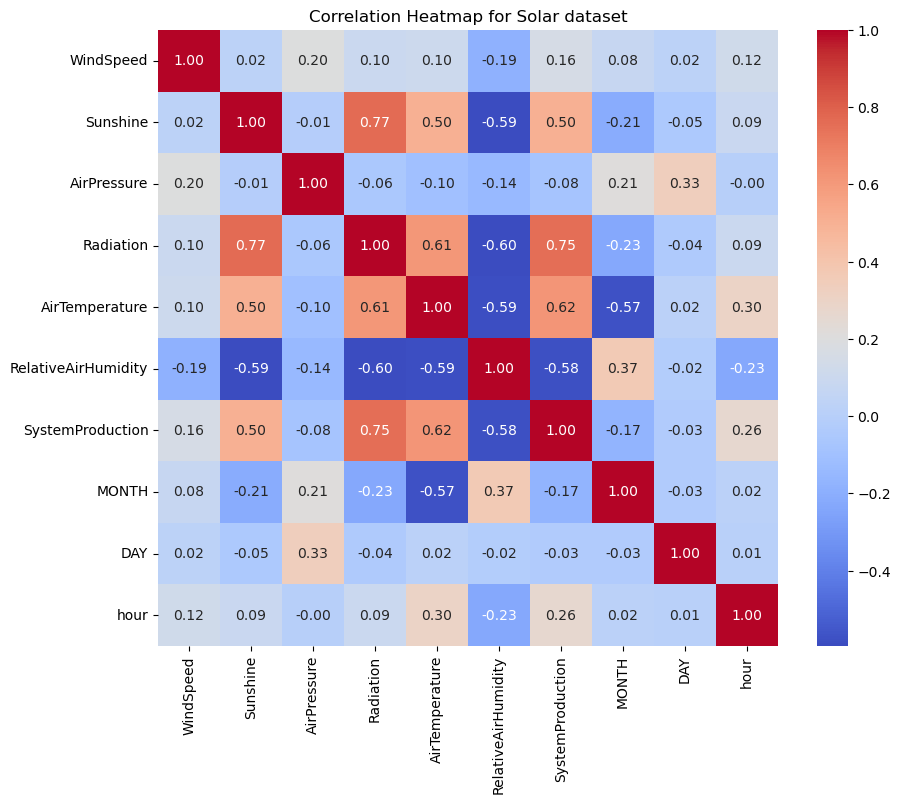

In [ ]:
df_solar_3 = remove_outliers(df_solar_3, 'SystemProduction')
# Heatmap for Solar dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df_solar_3.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Solar dataset")
plt.show()

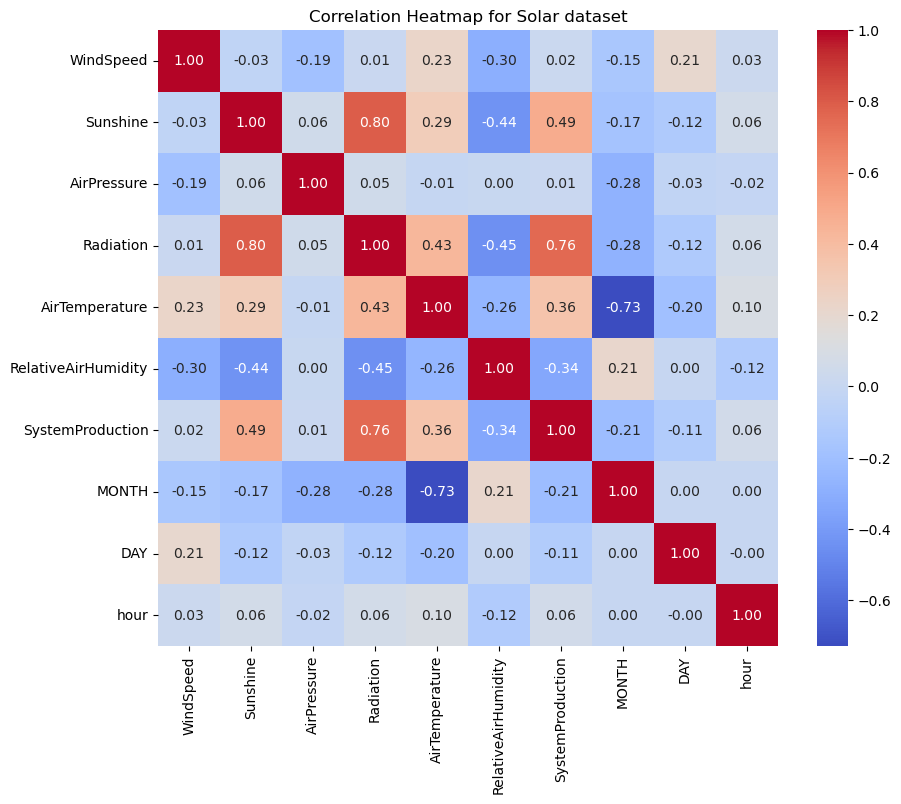

In [ ]:
# Heatmap for Solar dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df_solar_4.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Solar dataset")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Function to train and evaluate models on individual subsets
def train_and_evaluate_models_on_subsets(X_train, y_train, X_test, y_test):
    models = {
        "Decision Tree": DecisionTreeRegressor(),
        "K Neighbors": KNeighborsRegressor(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(),
        "Lasso": Lasso(),
        "Ridge": Ridge()
    }

    results = {}
    num_subsets = len(models)
    subset_size = len(X_train) // num_subsets

    model_names = list(models.keys())

    for i, (name, model) in enumerate(models.items()):
        # Determine subset indices
        start_index = i * subset_size
        if i == num_subsets - 1:  # Last subset takes the remainder of the data
            end_index = len(X_train)
        else:
            end_index = start_index + subset_size

        # Extract subset for training
        X_train_subset = X_train.iloc[start_index:end_index]
        y_train_subset = y_train.iloc[start_index:end_index]

        # Fit model on subset
        model.fit(X_train_subset, y_train_subset)
        # Predict on the common test set
        y_pred = model.predict(X_test)

        # Evaluate model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        results[name] = {"MSE": mse, "R-squared": r2, "MAE": mae}

    return results

# Splitting the main dataset into training and testing sets
X_solar_1 = df_solar_1.drop(["SystemProduction"], axis=1)
y_solar_1 = df_solar_1["SystemProduction"]
X_train_solar, X_test_solar, y_train_solar, y_test_solar = train_test_split(X_solar_1, y_solar_1, test_size=0.2, random_state=42)

# Apply the train and evaluate function on subsets
results = train_and_evaluate_models_on_subsets(X_train_solar, y_train_solar, X_test_solar, y_test_solar)
for model, metrics in results.items():
    print(f"{model}: MSE={metrics['MSE']}, R-squared={metrics['R-squared']}, MAE={metrics['MAE']}")

Decision Tree: MSE=329607.4282517123, R-squared=0.6661757440154978, MAE=198.31365717592595
K Neighbors: MSE=228011.90969770713, R-squared=0.7690710233256184, MAE=170.98865393518517
Random Forest: MSE=250531.19250218556, R-squared=0.7462636404113938, MAE=178.52712861574076
XGBoost: MSE=338455.84482756286, R-squared=0.6572141253537409, MAE=181.94695286809304
Lasso: MSE=261480.63446490714, R-squared=0.7351741169257165, MAE=269.98996142090436
Ridge: MSE=256873.40775680245, R-squared=0.7398402861202119, MAE=253.9238949750423


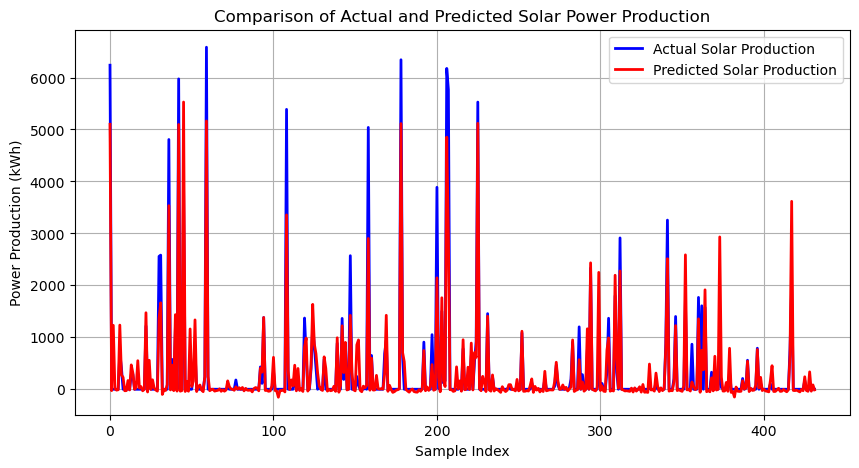

Selected models and their corresponding weights for Solar dataset:
Decision Tree: Weight - 0.15754642529635488
K Neighbors: Weight - 0.17762725377819288
Random Forest: Weight - 0.17235958321195163
XGBoost: Weight - 0.15179240497973567
Lasso: Weight - 0.16979830922980133
Ridge: Weight - 0.1708760235039636

Weighted Avg Accuracy for Solar dataset: 85.624


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Function to train and evaluate models on individual subsets
def train_and_evaluate_models_on_subsets(X_train, y_train, X_test, y_test):
    models = {
        "Decision Tree": DecisionTreeRegressor(),
        "K Neighbors": KNeighborsRegressor(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(),
        "Lasso": Lasso(),
        "Ridge": Ridge()
    }

    results = {}
    num_subsets = len(models)
    subset_size = len(X_train) // num_subsets

    for i, (name, model) in enumerate(models.items()):
        # Determine subset indices
        start_index = i * subset_size
        end_index = len(X_train) if i == num_subsets - 1 else start_index + subset_size

        # Extract subset for training
        X_train_subset = X_train.iloc[start_index:end_index]
        y_train_subset = y_train.iloc[start_index:end_index]

        # Fit model on subset
        model.fit(X_train_subset, y_train_subset)
        # Predict on the common test set
        y_pred = model.predict(X_test)

        # Evaluate model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        # Store model and metrics in results
        results[name] = {
            "model": model,  # Storing the model instance
            "MSE": mse,
            "R-squared": r2,
            "MAE": mae
        }

    return results

# Call the function with correctly formatted data
results_solar = train_and_evaluate_models_on_subsets(X_train_solar, y_train_solar, X_test_solar, y_test_solar)

# Extract the accuracy scores from the results
scores_solar = [results_solar[model]['R-squared'] for model in results_solar]

# Find models with accuracy scores greater than the average accuracy score
avg_score_solar = sum(scores_solar) / len(scores_solar)
#avg_score_solar
models_filtered_solar = [model for model, score in zip(results_solar.keys(), scores_solar) if score > 0 ]

# Calculate weights for each model
weights_solar = [(score / sum(scores_solar)) for score in scores_solar]

# Create list of (name, estimator) tuples for Solar dataset
estimators_solar = [(model, results_solar[model]['model']) for model in models_filtered_solar]

# Adjust weights based on the number of retained models
weights_solar_adjusted = weights_solar[:len(estimators_solar)]

# Create VotingRegressor ensemble for Solar dataset
ensemble_solar_1 = VotingRegressor(estimators=estimators_solar, weights=weights_solar_adjusted)

# Fit the ensemble on the training dataset
ensemble_solar_1.fit(X_train_solar, y_train_solar)

# Make predictions on the test set
yhat_solar = ensemble_solar_1.predict(X_test_solar)

# Evaluate predictions
score_solar = r2_score(y_test_solar, yhat_solar)
import matplotlib.pyplot as plt
import pandas as pd  # For using rolling mean if necessary

plt.figure(figsize=(10, 5))  # Set the figure size as desired

# If the data is very noisy, you might want to smooth it
# Example of applying a rolling mean with a window of 10 data points
# Uncomment the next two lines to apply smoothing
# y_test_solar_smooth = y_test_solar.rolling(window=10).mean()
# yhat_solar_smooth = pd.Series(yhat_solar).rolling(window=10).mean()

# Plotting the actual solar production
plt.plot(y_test_solar.reset_index(drop=True), label='Actual Solar Production', color='blue', linestyle='-', linewidth=2)

# Plotting the predicted solar production
plt.plot(yhat_solar, label='Predicted Solar Production', color='red', linestyle='-', linewidth=2)

plt.title('Comparison of Actual and Predicted Solar Power Production')
plt.xlabel('Sample Index')
plt.ylabel('Power Production (kWh)')  # Ensure unit is mentioned if known
plt.legend()
plt.grid(True)
plt.show()
# Print the selected models and their corresponding weights
print("Selected models and their corresponding weights for Solar dataset:")
for model, weight in zip(models_filtered_solar, weights_solar_adjusted):
    print(f"{model}: Weight - {weight}")

print('\nWeighted Avg Accuracy for Solar dataset: %.3f' % (score_solar * 100))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Function to train and evaluate models on individual subsets
def train_and_evaluate_models_on_subsets(X_train, y_train, X_test, y_test):
    models = {
        "Decision Tree": DecisionTreeRegressor(),
        "K Neighbors": KNeighborsRegressor(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(),
        "Lasso": Lasso(),
        "Ridge": Ridge()
    }

    results = {}
    num_subsets = len(models)
    subset_size = len(X_train) // num_subsets

    model_names = list(models.keys())

    for i, (name, model) in enumerate(models.items()):
        # Determine subset indices
        start_index = i * subset_size
        if i == num_subsets - 1:  # Last subset takes the remainder of the data
            end_index = len(X_train)
        else:
            end_index = start_index + subset_size

        # Extract subset for training
        X_train_subset = X_train.iloc[start_index:end_index]
        y_train_subset = y_train.iloc[start_index:end_index]

        # Fit model on subset
        model.fit(X_train_subset, y_train_subset)
        # Predict on the common test set
        y_pred = model.predict(X_test)

        # Evaluate model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        results[name] = {"MSE": mse, "R-squared": r2, "MAE": mae}

    return results

# Splitting the main dataset into training and testing sets
X_solar_2 = df_solar_2.drop(["SystemProduction"], axis=1)
y_solar_2 = df_solar_2["SystemProduction"]
X_train_solar, X_test_solar, y_train_solar, y_test_solar = train_test_split(X_solar_2, y_solar_2, test_size=0.2, random_state=42)

# Apply the train and evaluate function on subsets
results = train_and_evaluate_models_on_subsets(X_train_solar, y_train_solar, X_test_solar, y_test_solar)
for model, metrics in results.items():
    print(f"{model}: MSE={metrics['MSE']}, R-squared={metrics['R-squared']}, MAE={metrics['MAE']}")

Decision Tree: MSE=236460.76635552887, R-squared=0.6507892371029285, MAE=243.0946880952381
K Neighbors: MSE=456635.7846213773, R-squared=0.32562964600234845, MAE=388.30159031746035
Random Forest: MSE=213882.66208231403, R-squared=0.6841331069530511, MAE=255.51107194179892
XGBoost: MSE=231356.4972181388, R-squared=0.6583273405565051, MAE=249.6989883634577
Lasso: MSE=448429.44460217946, R-squared=0.3377489599285669, MAE=453.28445140524366
Ridge: MSE=508933.71103191044, R-squared=0.24839485115144289, MAE=531.2642973549238


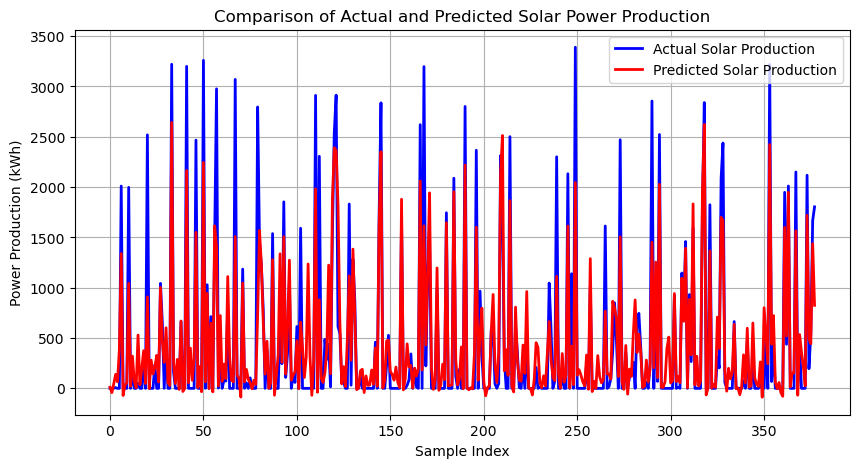

Selected models and their corresponding weights for Solar dataset:
Decision Tree: Weight - 0.21227674132286906
K Neighbors: Weight - 0.11378856708185568
Random Forest: Weight - 0.23906461493645503
XGBoost: Weight - 0.23004700484854895
Lasso: Weight - 0.1180235603713476
Ridge: Weight - 0.08679951143892368

Weighted Avg Accuracy for Solar dataset: 79.578


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Function to train and evaluate models on individual subsets
def train_and_evaluate_models_on_subsets(X_train, y_train, X_test, y_test):
    models = {
        "Decision Tree": DecisionTreeRegressor(),
        "K Neighbors": KNeighborsRegressor(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(),
        "Lasso": Lasso(),
        "Ridge": Ridge()
    }

    results = {}
    num_subsets = len(models)
    subset_size = len(X_train) // num_subsets

    for i, (name, model) in enumerate(models.items()):
        # Determine subset indices
        start_index = i * subset_size
        end_index = len(X_train) if i == num_subsets - 1 else start_index + subset_size

        # Extract subset for training
        X_train_subset = X_train.iloc[start_index:end_index]
        y_train_subset = y_train.iloc[start_index:end_index]

        # Fit model on subset
        model.fit(X_train_subset, y_train_subset)
        # Predict on the common test set
        y_pred = model.predict(X_test)

        # Evaluate model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        # Store model and metrics in results
        results[name] = {
            "model": model,  # Storing the model instance
            "MSE": mse,
            "R-squared": r2,
            "MAE": mae
        }

    return results

# Call the function with correctly formatted data
results_solar = train_and_evaluate_models_on_subsets(X_train_solar, y_train_solar, X_test_solar, y_test_solar)

# Extract the accuracy scores from the results
scores_solar = [results_solar[model]['R-squared'] for model in results_solar]

# Find models with accuracy scores greater than the average accuracy score
avg_score_solar = sum(scores_solar) / len(scores_solar)
#avg_score_solar
models_filtered_solar = [model for model, score in zip(results_solar.keys(), scores_solar) if score > 0 ]

# Calculate weights for each model
weights_solar = [(score / sum(scores_solar)) for score in scores_solar]

# Create list of (name, estimator) tuples for Solar dataset
estimators_solar = [(model, results_solar[model]['model']) for model in models_filtered_solar]

# Adjust weights based on the number of retained models
weights_solar_adjusted = weights_solar[:len(estimators_solar)]

# Create VotingRegressor ensemble for Solar dataset
ensemble_solar_2 = VotingRegressor(estimators=estimators_solar, weights=weights_solar_adjusted)

# Fit the ensemble on the training dataset
ensemble_solar_2.fit(X_train_solar, y_train_solar)

# Make predictions on the test set
yhat_solar = ensemble_solar_2.predict(X_test_solar)

# Evaluate predictions
score_solar = r2_score(y_test_solar, yhat_solar)
import matplotlib.pyplot as plt
import pandas as pd  # For using rolling mean if necessary

plt.figure(figsize=(10, 5))  # Set the figure size as desired

# If the data is very noisy, you might want to smooth it
# Example of applying a rolling mean with a window of 10 data points
# Uncomment the next two lines to apply smoothing
# y_test_solar_smooth = y_test_solar.rolling(window=10).mean()
# yhat_solar_smooth = pd.Series(yhat_solar).rolling(window=10).mean()

# Plotting the actual solar production
plt.plot(y_test_solar.reset_index(drop=True), label='Actual Solar Production', color='blue', linestyle='-', linewidth=2)

# Plotting the predicted solar production
plt.plot(yhat_solar, label='Predicted Solar Production', color='red', linestyle='-', linewidth=2)

plt.title('Comparison of Actual and Predicted Solar Power Production')
plt.xlabel('Sample Index')
plt.ylabel('Power Production (kWh)')  # Ensure unit is mentioned if known
plt.legend()
plt.grid(True)
plt.show()
# Print the selected models and their corresponding weights
print("Selected models and their corresponding weights for Solar dataset:")
for model, weight in zip(models_filtered_solar, weights_solar_adjusted):
    print(f"{model}: Weight - {weight}")

print('\nWeighted Avg Accuracy for Solar dataset: %.3f' % (score_solar * 100))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Function to train and evaluate models on individual subsets
def train_and_evaluate_models_on_subsets(X_train, y_train, X_test, y_test):
    models = {
        "Decision Tree": DecisionTreeRegressor(),
        "K Neighbors": KNeighborsRegressor(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(),
        "Lasso": Lasso(),
        "Ridge": Ridge()
    }

    results = {}
    num_subsets = len(models)
    subset_size = len(X_train) // num_subsets

    model_names = list(models.keys())

    for i, (name, model) in enumerate(models.items()):
        # Determine subset indices
        start_index = i * subset_size
        if i == num_subsets - 1:  # Last subset takes the remainder of the data
            end_index = len(X_train)
        else:
            end_index = start_index + subset_size

        # Extract subset for training
        X_train_subset = X_train.iloc[start_index:end_index]
        y_train_subset = y_train.iloc[start_index:end_index]

        # Fit model on subset
        model.fit(X_train_subset, y_train_subset)
        # Predict on the common test set
        y_pred = model.predict(X_test)

        # Evaluate model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        results[name] = {"MSE": mse, "R-squared": r2, "MAE": mae}

    return results

# Splitting the main dataset into training and testing sets
X_solar_3 = df_solar_3.drop(["SystemProduction"], axis=1)
y_solar_3 = df_solar_3["SystemProduction"]
X_train_solar, X_test_solar, y_train_solar, y_test_solar = train_test_split(X_solar_3, y_solar_3, test_size=0.2, random_state=42)

# Apply the train and evaluate function on subsets
results = train_and_evaluate_models_on_subsets(X_train_solar, y_train_solar, X_test_solar, y_test_solar)
for model, metrics in results.items():
    print(f"{model}: MSE={metrics['MSE']}, R-squared={metrics['R-squared']}, MAE={metrics['MAE']}")

Decision Tree: MSE=448215.4132499189, R-squared=0.6163397855693887, MAE=354.3269717557252
K Neighbors: MSE=532165.4731609976, R-squared=0.5444808154518479, MAE=419.6871481424936
Random Forest: MSE=314231.7509719266, R-squared=0.7310261597550771, MAE=317.3584167430025
XGBoost: MSE=265370.7210089482, R-squared=0.7728498737076455, MAE=289.29060177726114
Lasso: MSE=445152.3100848881, R-squared=0.6189617186452679, MAE=468.93157758514985
Ridge: MSE=425178.3475375796, R-squared=0.6360588878353343, MAE=430.4103977952286


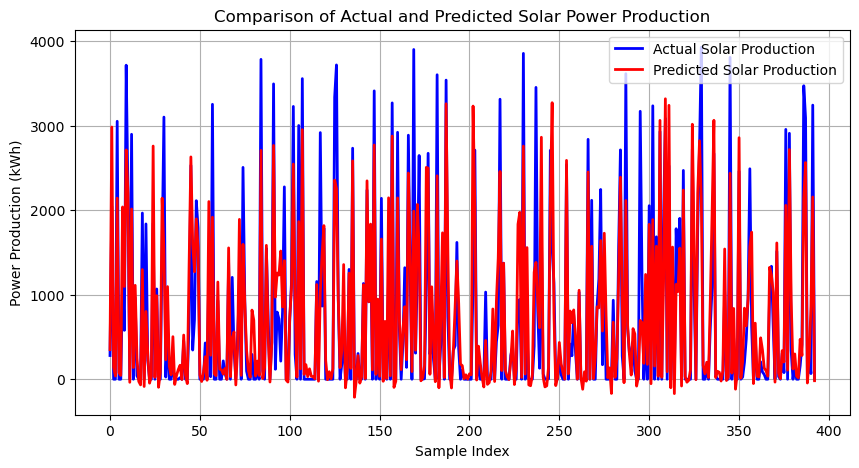

Selected models and their corresponding weights for Solar dataset:
Decision Tree: Weight - 0.15077182457615146
K Neighbors: Weight - 0.13997445211847517
Random Forest: Weight - 0.18793129765476396
XGBoost: Weight - 0.1986832861177777
Lasso: Weight - 0.15912191025092823
Ridge: Weight - 0.16351722928190346

Weighted Avg Accuracy for Solar dataset: 77.794


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Function to train and evaluate models on individual subsets
def train_and_evaluate_models_on_subsets(X_train, y_train, X_test, y_test):
    models = {
        "Decision Tree": DecisionTreeRegressor(),
        "K Neighbors": KNeighborsRegressor(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(),
        "Lasso": Lasso(),
        "Ridge": Ridge()
    }

    results = {}
    num_subsets = len(models)
    subset_size = len(X_train) // num_subsets

    for i, (name, model) in enumerate(models.items()):
        # Determine subset indices
        start_index = i * subset_size
        end_index = len(X_train) if i == num_subsets - 1 else start_index + subset_size

        # Extract subset for training
        X_train_subset = X_train.iloc[start_index:end_index]
        y_train_subset = y_train.iloc[start_index:end_index]

        # Fit model on subset
        model.fit(X_train_subset, y_train_subset)
        # Predict on the common test set
        y_pred = model.predict(X_test)

        # Evaluate model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        # Store model and metrics in results
        results[name] = {
            "model": model,  # Storing the model instance
            "MSE": mse,
            "R-squared": r2,
            "MAE": mae
        }

    return results

# Call the function with correctly formatted data
results_solar = train_and_evaluate_models_on_subsets(X_train_solar, y_train_solar, X_test_solar, y_test_solar)

# Extract the accuracy scores from the results
scores_solar = [results_solar[model]['R-squared'] for model in results_solar]

# Find models with accuracy scores greater than the average accuracy score
avg_score_solar = sum(scores_solar) / len(scores_solar)
#avg_score_solar
models_filtered_solar = [model for model, score in zip(results_solar.keys(), scores_solar) if score > 0 ]

# Calculate weights for each model
weights_solar = [(score / sum(scores_solar)) for score in scores_solar]

# Create list of (name, estimator) tuples for Solar dataset
estimators_solar = [(model, results_solar[model]['model']) for model in models_filtered_solar]

# Adjust weights based on the number of retained models
weights_solar_adjusted = weights_solar[:len(estimators_solar)]

# Create VotingRegressor ensemble for Solar dataset
ensemble_solar_3 = VotingRegressor(estimators=estimators_solar, weights=weights_solar_adjusted)

# Fit the ensemble on the training dataset
ensemble_solar_3.fit(X_train_solar, y_train_solar)

# Make predictions on the test set
yhat_solar = ensemble_solar_3.predict(X_test_solar)

# Evaluate predictions
score_solar = r2_score(y_test_solar, yhat_solar)
import matplotlib.pyplot as plt
import pandas as pd  # For using rolling mean if necessary

plt.figure(figsize=(10, 5))  # Set the figure size as desired

# If the data is very noisy, you might want to smooth it
# Example of applying a rolling mean with a window of 10 data points
# Uncomment the next two lines to apply smoothing
# y_test_solar_smooth = y_test_solar.rolling(window=10).mean()
# yhat_solar_smooth = pd.Series(yhat_solar).rolling(window=10).mean()

# Plotting the actual solar production
plt.plot(y_test_solar.reset_index(drop=True), label='Actual Solar Production', color='blue', linestyle='-', linewidth=2)

# Plotting the predicted solar production
plt.plot(yhat_solar, label='Predicted Solar Production', color='red', linestyle='-', linewidth=2)

plt.title('Comparison of Actual and Predicted Solar Power Production')
plt.xlabel('Sample Index')
plt.ylabel('Power Production (kWh)')  # Ensure unit is mentioned if known
plt.legend()
plt.grid(True)
plt.show()

# Print the selected models and their corresponding weights
print("Selected models and their corresponding weights for Solar dataset:")
for model, weight in zip(models_filtered_solar, weights_solar_adjusted):
    print(f"{model}: Weight - {weight}")

print('\nWeighted Avg Accuracy for Solar dataset: %.3f' % (score_solar * 100))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Function to train and evaluate models on individual subsets
def train_and_evaluate_models_on_subsets(X_train, y_train, X_test, y_test):
    models = {
        "Decision Tree": DecisionTreeRegressor(),
        "K Neighbors": KNeighborsRegressor(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(),
        "Lasso": Lasso(),
        "Ridge": Ridge()
    }

    results = {}
    num_subsets = len(models)
    subset_size = len(X_train) // num_subsets

    model_names = list(models.keys())

    for i, (name, model) in enumerate(models.items()):
        # Determine subset indices
        start_index = i * subset_size
        if i == num_subsets - 1:  # Last subset takes the remainder of the data
            end_index = len(X_train)
        else:
            end_index = start_index + subset_size

        # Extract subset for training
        X_train_subset = X_train.iloc[start_index:end_index]
        y_train_subset = y_train.iloc[start_index:end_index]

        # Fit model on subset
        model.fit(X_train_subset, y_train_subset)
        # Predict on the common test set
        y_pred = model.predict(X_test)

        # Evaluate model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        results[name] = {"MSE": mse, "R-squared": r2, "MAE": mae}

    return results

# Splitting the main dataset into training and testing sets
X_solar_4 = df_solar_4.drop(["SystemProduction"], axis=1)
y_solar_4 = df_solar_4["SystemProduction"]
X_train_solar, X_test_solar, y_train_solar, y_test_solar = train_test_split(X_solar_4, y_solar_4, test_size=0.2, random_state=42)

# Apply the train and evaluate function on subsets
results = train_and_evaluate_models_on_subsets(X_train_solar, y_train_solar, X_test_solar, y_test_solar)
for model, metrics in results.items():
    print(f"{model}: MSE={metrics['MSE']}, R-squared={metrics['R-squared']}, MAE={metrics['MAE']}")

Decision Tree: MSE=505681.17636050266, R-squared=-0.19417233089861186, MAE=171.19146199095022
K Neighbors: MSE=244224.88129952268, R-squared=0.4232599325449846, MAE=121.11828877828054
Random Forest: MSE=181736.70581568909, R-squared=0.5708265291665937, MAE=122.02223673755655
XGBoost: MSE=223616.3773360854, R-squared=0.47192716867086826, MAE=119.41750358007927
Lasso: MSE=181458.68151834205, R-squared=0.5714830869716496, MAE=161.95223523790173
Ridge: MSE=217730.13378491925, R-squared=0.48582760536958747, MAE=147.76148842697907


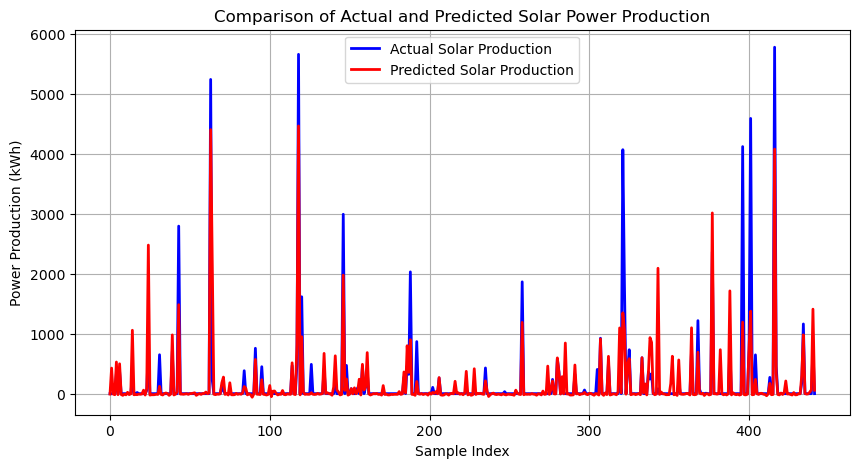

Selected models and their corresponding weights for Solar dataset:
Decision Tree: Weight - 0.15650390109879794
K Neighbors: Weight - 0.14148720349095437
Random Forest: Weight - 0.19081572121558016
XGBoost: Weight - 0.1577556726079866
Lasso: Weight - 0.19103519516202475
Ridge: Weight - 0.16240230642465617

Weighted Avg Accuracy for Solar dataset: 69.333


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Function to train and evaluate models on individual subsets
def train_and_evaluate_models_on_subsets(X_train, y_train, X_test, y_test):
    models = {
        "Decision Tree": DecisionTreeRegressor(),
        "K Neighbors": KNeighborsRegressor(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
        "XGBoost": XGBRegressor(),
        "Lasso": Lasso(),
        "Ridge": Ridge()
    }

    results = {}
    num_subsets = len(models)
    subset_size = len(X_train) // num_subsets

    for i, (name, model) in enumerate(models.items()):
        # Determine subset indices
        start_index = i * subset_size
        end_index = len(X_train) if i == num_subsets - 1 else start_index + subset_size

        # Extract subset for training
        X_train_subset = X_train.iloc[start_index:end_index]
        y_train_subset = y_train.iloc[start_index:end_index]

        # Fit model on subset
        model.fit(X_train_subset, y_train_subset)
        # Predict on the common test set
        y_pred = model.predict(X_test)

        # Evaluate model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        # Store model and metrics in results
        results[name] = {
            "model": model,  # Storing the model instance
            "MSE": mse,
            "R-squared": r2,
            "MAE": mae
        }

    return results

# Call the function with correctly formatted data
results_solar = train_and_evaluate_models_on_subsets(X_train_solar, y_train_solar, X_test_solar, y_test_solar)

# Extract the accuracy scores from the results
scores_solar = [results_solar[model]['R-squared'] for model in results_solar]

# Find models with accuracy scores greater than the average accuracy score
avg_score_solar = sum(scores_solar) / len(scores_solar)
#avg_score_solar
models_filtered_solar = [model for model, score in zip(results_solar.keys(), scores_solar) if score > 0 ]

# Calculate weights for each model
weights_solar = [(score / sum(scores_solar)) for score in scores_solar]

# Create list of (name, estimator) tuples for Solar dataset
estimators_solar = [(model, results_solar[model]['model']) for model in models_filtered_solar]

# Adjust weights based on the number of retained models
weights_solar_adjusted = weights_solar[:len(estimators_solar)]

# Create VotingRegressor ensemble for Solar dataset
ensemble_solar_4 = VotingRegressor(estimators=estimators_solar, weights=weights_solar_adjusted)

# Fit the ensemble on the training dataset
ensemble_solar_4.fit(X_train_solar, y_train_solar)

# Make predictions on the test set
yhat_solar = ensemble_solar_4.predict(X_test_solar)

# Evaluate predictions
score_solar = r2_score(y_test_solar, yhat_solar)
import matplotlib.pyplot as plt
import pandas as pd  # For using rolling mean if necessary

plt.figure(figsize=(10, 5))  # Set the figure size as desired

# If the data is very noisy, you might want to smooth it
# Example of applying a rolling mean with a window of 10 data points
# Uncomment the next two lines to apply smoothing
# y_test_solar_smooth = y_test_solar.rolling(window=10).mean()
# yhat_solar_smooth = pd.Series(yhat_solar).rolling(window=10).mean()

# Plotting the actual solar production
plt.plot(y_test_solar.reset_index(drop=True), label='Actual Solar Production', color='blue', linestyle='-', linewidth=2)

# Plotting the predicted solar production
plt.plot(yhat_solar, label='Predicted Solar Production', color='red', linestyle='-', linewidth=2)

plt.title('Comparison of Actual and Predicted Solar Power Production')
plt.xlabel('Sample Index')
plt.ylabel('Power Production (kWh)')  # Ensure unit is mentioned if known
plt.legend()
plt.grid(True)
plt.show()

# Print the selected models and their corresponding weights
print("Selected models and their corresponding weights for Solar dataset:")
for model, weight in zip(models_filtered_solar, weights_solar_adjusted):
    print(f"{model}: Weight - {weight}")

print('\nWeighted Avg Accuracy for Solar dataset: %.3f' % (score_solar * 100))

In [ ]:
file_path_wind_1 = "C:\\Users\\tirth\\Downloads\\Renewable Energy\\Project\\Datasets\\Wind\\Wind Power Plant Data Q1.csv"
df_wind_1 = pd.read_csv(file_path_wind_1)
file_path_wind_2 = "C:\\Users\\tirth\\Downloads\\Renewable Energy\\Project\\Datasets\\Wind\\Wind Power Plant Data Q2.csv"
df_wind_2 = pd.read_csv(file_path_wind_2)
file_path_wind_3 = "C:\\Users\\tirth\\Downloads\\Renewable Energy\\Project\\Datasets\\Wind\\Wind Power Plant Data Q3.csv"
df_wind_3 = pd.read_csv(file_path_wind_3)
file_path_wind_4 = "C:\\Users\\tirth\\Downloads\\Renewable Energy\\Project\\Datasets\\Wind\\Wind Power Plant Data Q4.csv"
df_wind_4 = pd.read_csv(file_path_wind_4)

In [ ]:
df_wind_1['Date']=pd.to_datetime(df_wind_1['Date'],format="%d-%m-%Y")
df_wind_1['Time']=pd.to_datetime(df_wind_1['Time'],format="%H:%M")
df_wind_1['MONTH']=df_wind_1['Date'].dt.month
df_wind_1['DAY']=df_wind_1['Date'].dt.day
df_wind_1['hour']=df_wind_1['Time'].dt.hour
df_wind_1 = df_wind_1.drop(['Date'],axis=1)
df_wind_1 = df_wind_1.drop(['Time'],axis=1)
df_wind_1.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),MONTH,DAY,hour
0,380.047791,5.311336,416.328908,259.994904,1,1,0
1,453.769196,5.672167,519.917511,268.641113,1,1,0
2,306.376587,5.216037,390.900016,272.564789,1,1,0
3,419.645904,5.659674,516.127569,271.258087,1,1,0
4,380.650696,5.577941,491.702972,265.674286,1,1,0


In [ ]:
df_wind_2['Date']=pd.to_datetime(df_wind_2['Date'],format="%d-%m-%Y")
df_wind_2['Time']=pd.to_datetime(df_wind_2['Time'],format="%H:%M")
df_wind_2['MONTH']=df_wind_2['Date'].dt.month
df_wind_2['DAY']=df_wind_2['Date'].dt.day
df_wind_2['hour']=df_wind_2['Time'].dt.hour
df_wind_2 = df_wind_2.drop(['Date'],axis=1)
df_wind_2 = df_wind_2.drop(['Time'],axis=1)
df_wind_2.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),MONTH,DAY,hour
0,3603.643066,18.163980,3600.0,194.872299,4,1,0
1,3603.221924,18.161310,3600.0,195.501099,4,1,0
2,3603.364990,17.773621,3600.0,193.374298,4,1,0
3,3603.152100,18.805361,3600.0,190.116302,4,1,0
4,3603.032959,18.956020,3600.0,190.563705,4,1,0


In [ ]:
df_wind_3['Date']=pd.to_datetime(df_wind_3['Date'],format="%d-%m-%Y")
df_wind_3['Time']=pd.to_datetime(df_wind_3['Time'],format="%H:%M")
df_wind_3['MONTH']=df_wind_3['Date'].dt.month
df_wind_3['DAY']=df_wind_3['Date'].dt.day
df_wind_3['hour']=df_wind_3['Time'].dt.hour
df_wind_3 = df_wind_3.drop(['Date'],axis=1)
df_wind_3 = df_wind_3.drop(['Time'],axis=1)
df_wind_3.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),MONTH,DAY,hour
0,1473.840942,8.069484,1570.034762,242.697205,7,1,0
1,1428.651978,8.144855,1614.007829,244.895996,7,1,0
2,1346.494995,7.923681,1486.599346,244.389999,7,1,0
3,1273.417969,7.939813,1495.720774,243.602600,7,1,0
4,1502.305054,8.222449,1659.840322,245.853104,7,1,0


In [ ]:
df_wind_4['Date']=pd.to_datetime(df_wind_4['Date'],format="%d-%m-%Y")
df_wind_4['Time']=pd.to_datetime(df_wind_4['Time'],format="%H:%M")
df_wind_4['MONTH']=df_wind_4['Date'].dt.month
df_wind_4['DAY']=df_wind_4['Date'].dt.day
df_wind_4['hour']=df_wind_4['Time'].dt.hour
df_wind_4 = df_wind_4.drop(['Date'],axis=1)
df_wind_4 = df_wind_4.drop(['Time'],axis=1)
df_wind_4.head()

,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°),MONTH,DAY,hour
0,0.0,2.915549,0.000000,0.000000,10,2,16
1,0.0,3.253059,29.220990,0.000000,10,2,16
2,0.0,3.050276,17.811048,297.743103,10,2,16
3,0.0,3.124974,21.248649,303.482696,10,2,17
4,0.0,2.478945,0.000000,310.001801,10,2,17


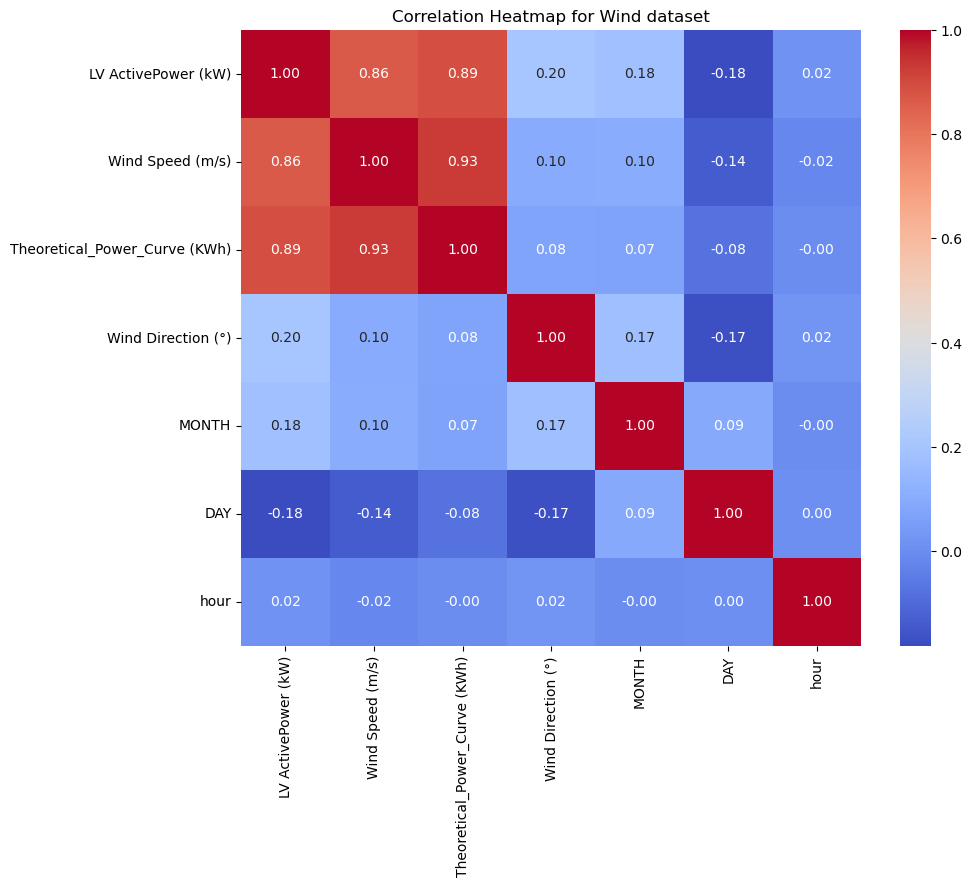

In [ ]:
df_wind_1 = remove_outliers(df_wind_1, 'LV ActivePower (kW)')
# Heatmap for Wind dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df_wind_1.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Wind dataset")
plt.show()


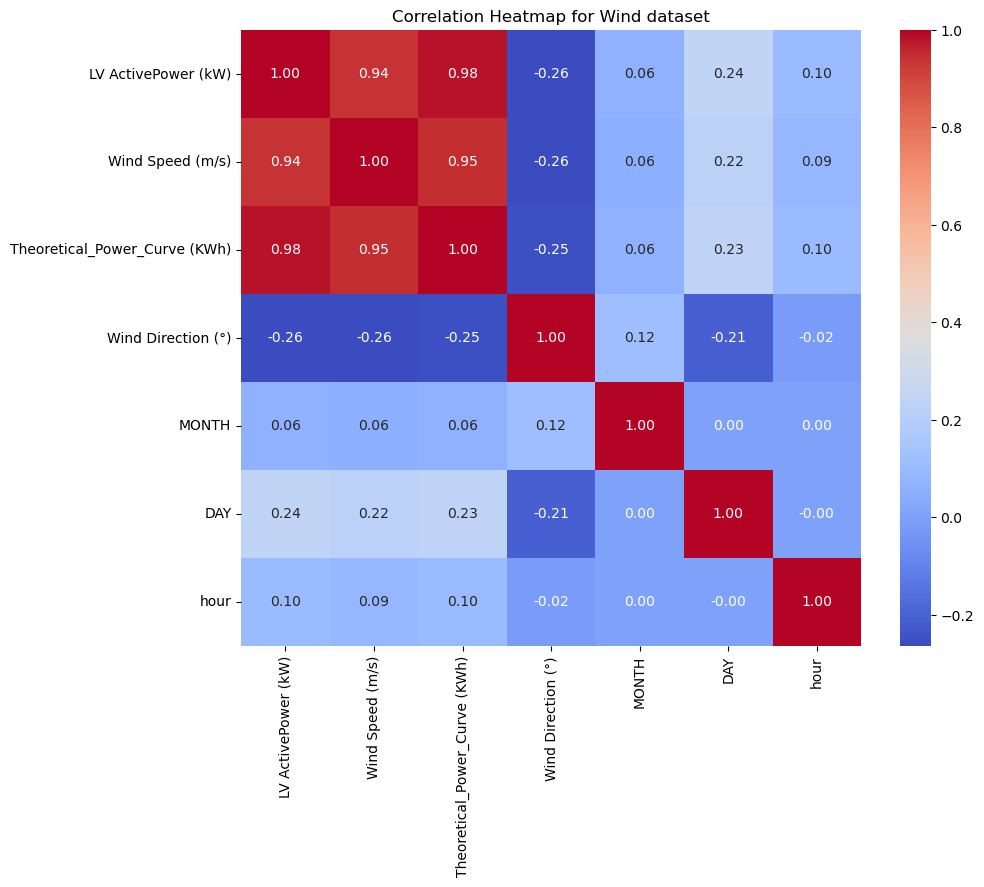

In [ ]:
df_wind_2 = remove_outliers(df_wind_2, 'LV ActivePower (kW)')
# Heatmap for Wind dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df_wind_2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Wind dataset")
plt.show()

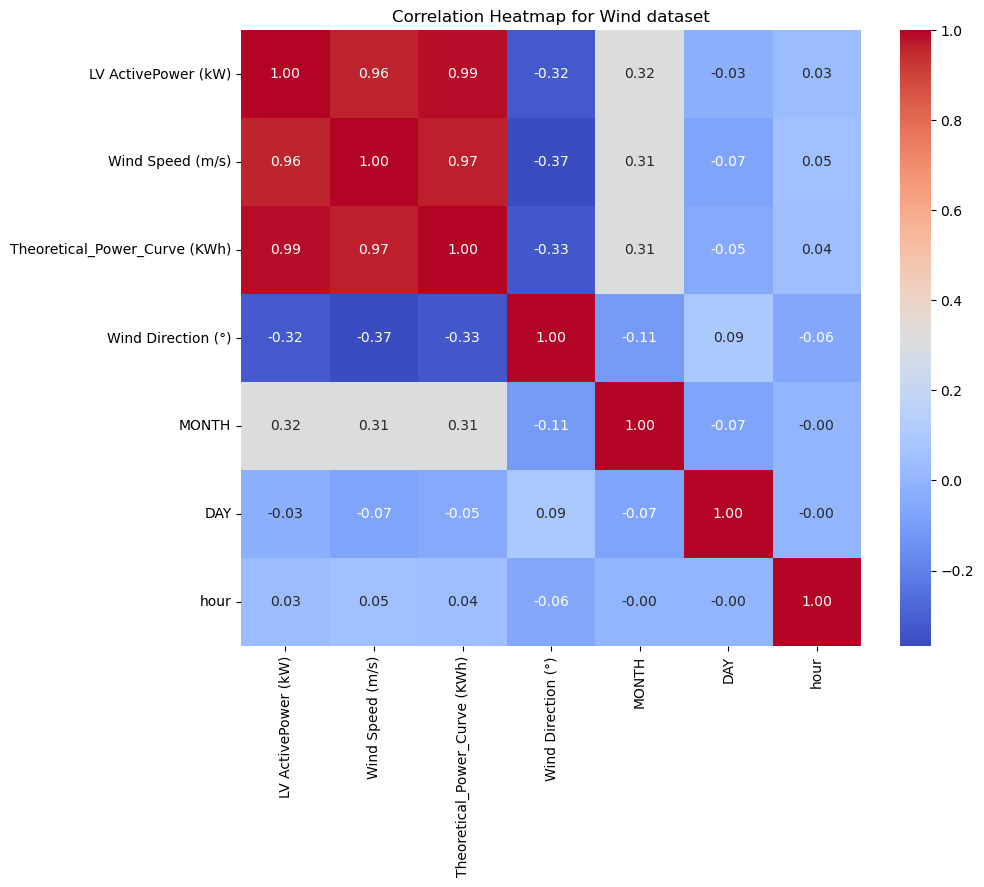

In [ ]:
df_wind_3 = remove_outliers(df_wind_3, 'LV ActivePower (kW)')
# Heatmap for Wind dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df_wind_3.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Wind dataset")
plt.show()

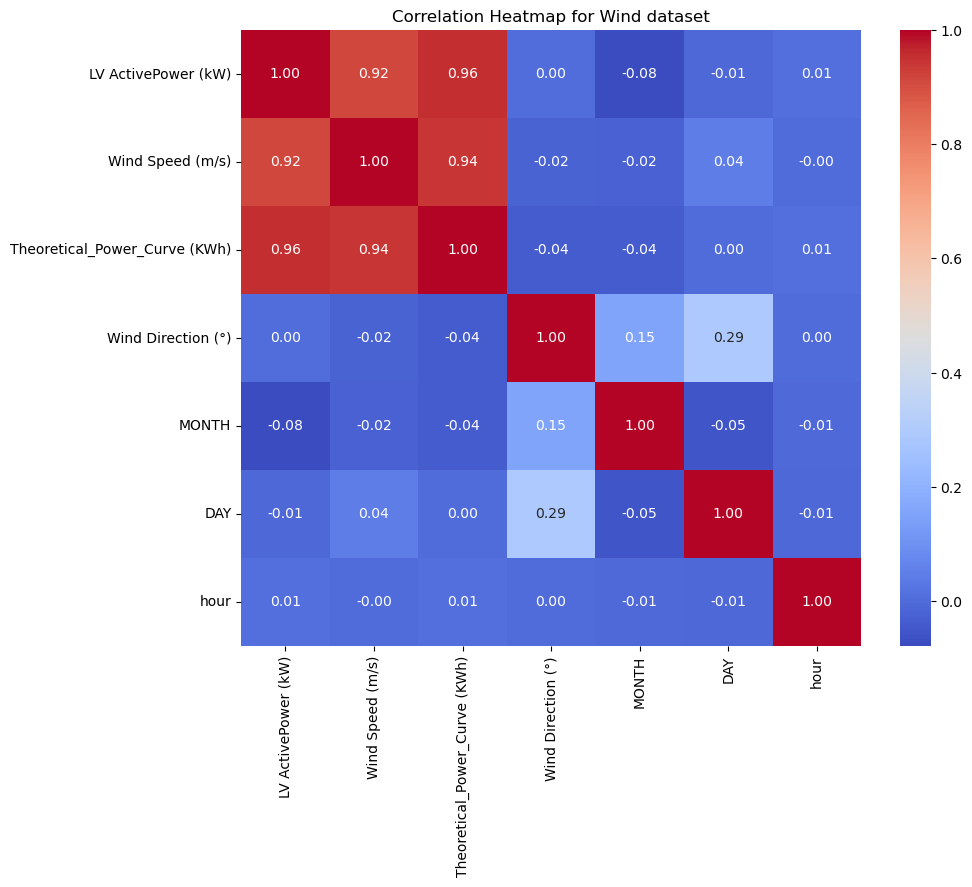

In [ ]:
df_wind_4 = remove_outliers(df_wind_4, 'LV ActivePower (kW)')
# Heatmap for Wind dataset
plt.figure(figsize=(10, 8))
sns.heatmap(df_wind_4.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap for Wind dataset")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Function to train and evaluate models on individual subsets
def train_and_evaluate_models_on_subsets(X_train, y_train, X_test, y_test):
  models = {
      "Decision Tree": DecisionTreeRegressor(),
      "K Neighbors": KNeighborsRegressor(),
      "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
      "XGBoost": XGBRegressor(),
      "Lasso": Lasso(),
      "Ridge": Ridge()
  }

  results = {}
  num_subsets = len(models)
  subset_size = len(X_train) // num_subsets

  model_names = list(models.keys())

  for i, (name, model) in enumerate(models.items()):
      # Determine subset indices
      start_index = i * subset_size
      if i == num_subsets - 1:  # Last subset takes the remainder of the data
          end_index = len(X_train)
      else:
          end_index = start_index + subset_size

      # Extract subset for training
      X_train_subset = X_train.iloc[start_index:end_index]
      y_train_subset = y_train.iloc[start_index:end_index]

      # Fit model on subset
      model.fit(X_train_subset, y_train_subset)
      # Predict on the common test set
      y_pred = model.predict(X_test)

      # Evaluate model
      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)
      mae = mean_absolute_error(y_test, y_pred)

      results[name] = {"MSE": mse, "R-squared": r2, "MAE": mae}

  return results

# Splitting the main dataset into training and testing sets
X_wind_1 = df_wind_1.drop(["LV ActivePower (kW)"], axis=1)
y_wind_1 = df_wind_1["LV ActivePower (kW)"]
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X_wind_1, y_wind_1, test_size=0.2, random_state=42)

# Apply the train and evaluate function on subsets
results_wind = train_and_evaluate_models_on_subsets(X_train_wind, y_train_wind, X_test_wind, y_test_wind)
print("\nWind Dataset Results:")
for model, metrics in results_wind.items():
  print(f"{model}: MSE={metrics['MSE']}, R-squared={metrics['R-squared']}, MAE={metrics['MAE']}")



Wind Dataset Results:
Decision Tree: MSE=330038.8050663337, R-squared=0.8450815332880706, MAE=204.1117688476565
K Neighbors: MSE=351307.75961998524, R-squared=0.8350979986932365, MAE=284.6729771907062
Random Forest: MSE=150155.81597609216, R-squared=0.9295176554338225, MAE=165.31638482719137
XGBoost: MSE=164604.7276155, R-squared=0.9227354128536406, MAE=167.8296776394768
Lasso: MSE=366918.90050967777, R-squared=0.8277702118599004, MAE=390.8542700124919
Ridge: MSE=365739.65913716203, R-squared=0.828323741513108, MAE=383.8782240377116


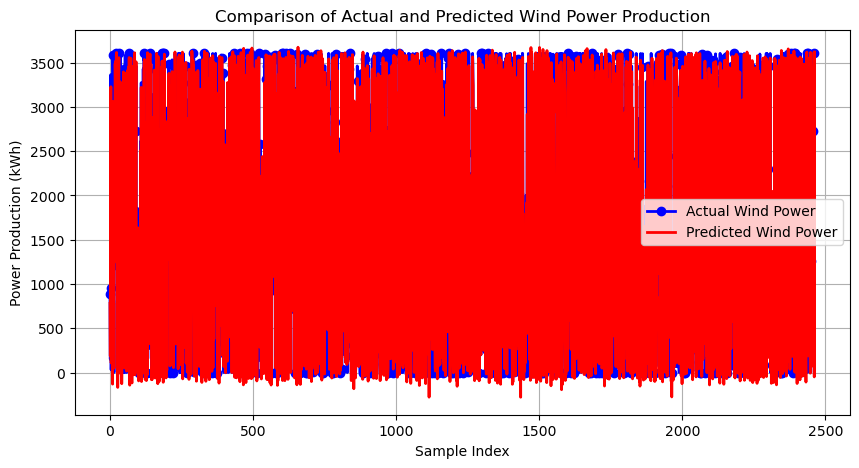

Selected models and their corresponding weights for Wind dataset:
Decision Tree: Weight - 0.17482401419787566
K Neighbors: Weight - 0.15992718192349056
Random Forest: Weight - 0.17861416818276224
XGBoost: Weight - 0.17990350745025976
Lasso: Weight - 0.15336860330010046
Ridge: Weight - 0.15336252494551125

Weighted Avg Accuracy for Wind dataset: 94.558


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
  models = {
      "Decision Tree": DecisionTreeRegressor(),
      "K Neighbors": KNeighborsRegressor(),
      "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
      "XGBoost": XGBRegressor(),
      "Lasso": Lasso(),
      "Ridge": Ridge()
  }

  results = {}
  for name, model in models.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)
      mae = mean_absolute_error(y_test, y_pred)
      results[name] = {"model": model, "MSE": mse, "R-squared": r2, "MAE": mae}
  return results

# Splitting the main dataset into training and testing sets
X_wind_1 = df_wind_1.drop(["LV ActivePower (kW)"], axis=1)
y_wind_1 = df_wind_1["LV ActivePower (kW)"]
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X_wind_1, y_wind_1, test_size=0.2, random_state=42)

# Train and evaluate models for Wind dataset
results_wind = train_and_evaluate_models(X_train_wind, X_test_wind, y_train_wind, y_test_wind)

# Extract the R-squared scores from the results
scores_wind = [results_wind[model]['R-squared'] for model in results_wind]

# Find models with R-squared scores greater than the average R-squared score
avg_score_wind = sum(scores_wind) / len(scores_wind)
models_filtered_wind = [model for model, score in zip(results_wind.keys(), scores_wind) if score > 0]

# Calculate weights for each model based on R-squared
weights_wind = [(score / sum(scores_wind)) for score in scores_wind]

# Create list of (name, estimator) tuples for Wind dataset
estimators_wind = [(model, results_wind[model]['model']) for model in models_filtered_wind]

# Adjust weights based on the number of retained models
weights_wind_adjusted = weights_wind[:len(estimators_wind)]

# Create VotingRegressor ensemble for Wind dataset
ensemble_wind_1 = VotingRegressor(estimators=estimators_wind, weights=weights_wind_adjusted)

# Fit the ensemble on the training dataset
ensemble_wind_1.fit(X_train_wind, y_train_wind)

# Make predictions on the test set
yhat_wind = ensemble_wind_1.predict(X_test_wind)

# Evaluate predictions
score_wind = r2_score(y_test_wind, yhat_wind)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Set the figure size as desired

# Plotting actual wind power production
plt.plot(y_test_wind.reset_index(drop=True), label='Actual Wind Power', color='blue', linestyle='-', linewidth=2, marker='o', markevery=5)  # Use markers less frequently

# Plotting predicted wind power production
plt.plot(yhat_wind, label='Predicted Wind Power', color='red', linestyle='-', linewidth=2)  # Solid line for prediction

plt.title('Comparison of Actual and Predicted Wind Power Production')
plt.xlabel('Sample Index')
plt.ylabel('Power Production (kWh)')  # Assuming the unit is kWh, adjust accordingly
plt.legend()
plt.grid(True)
plt.show()


# Print the selected models and their corresponding weights
print("Selected models and their corresponding weights for Wind dataset:")
for model, weight in zip(models_filtered_wind, weights_wind_adjusted):
  print(f"{model}: Weight - {weight}")

print('\nWeighted Avg Accuracy for Wind dataset: %.3f' % (score_wind * 100))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Function to train and evaluate models on individual subsets
def train_and_evaluate_models_on_subsets(X_train, y_train, X_test, y_test):
  models = {
      "Decision Tree": DecisionTreeRegressor(),
      "K Neighbors": KNeighborsRegressor(),
      "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
      "XGBoost": XGBRegressor(),
      "Lasso": Lasso(),
      "Ridge": Ridge()
  }

  results = {}
  num_subsets = len(models)
  subset_size = len(X_train) // num_subsets

  model_names = list(models.keys())

  for i, (name, model) in enumerate(models.items()):
      # Determine subset indices
      start_index = i * subset_size
      if i == num_subsets - 1:  # Last subset takes the remainder of the data
          end_index = len(X_train)
      else:
          end_index = start_index + subset_size

      # Extract subset for training
      X_train_subset = X_train.iloc[start_index:end_index]
      y_train_subset = y_train.iloc[start_index:end_index]

      # Fit model on subset
      model.fit(X_train_subset, y_train_subset)
      # Predict on the common test set
      y_pred = model.predict(X_test)

      # Evaluate model
      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)
      mae = mean_absolute_error(y_test, y_pred)

      results[name] = {"MSE": mse, "R-squared": r2, "MAE": mae}

  return results

# Splitting the main dataset into training and testing sets
X_wind_2 = df_wind_2.drop(["LV ActivePower (kW)"], axis=1)
y_wind_2 = df_wind_2["LV ActivePower (kW)"]
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X_wind_2, y_wind_2, test_size=0.2, random_state=42)

# Apply the train and evaluate function on subsets
results_wind = train_and_evaluate_models_on_subsets(X_train_wind, y_train_wind, X_test_wind, y_test_wind)
print("\nWind Dataset Results:")
for model, metrics in results_wind.items():
  print(f"{model}: MSE={metrics['MSE']}, R-squared={metrics['R-squared']}, MAE={metrics['MAE']}")



Wind Dataset Results:
Decision Tree: MSE=66622.35406929128, R-squared=0.9443613440591424, MAE=85.01612595869115
K Neighbors: MSE=41038.502945002525, R-squared=0.9657273121374537, MAE=72.95587543270277
Random Forest: MSE=42761.653213640646, R-squared=0.9642882491341944, MAE=68.5326999010985
XGBoost: MSE=41500.28464755029, R-squared=0.9653416621011143, MAE=65.5432241131936
Lasso: MSE=44782.48757283214, R-squared=0.9626005797446142, MAE=99.55157645470992
Ridge: MSE=45110.65051169002, R-squared=0.9623265194070184, MAE=95.06258930847329


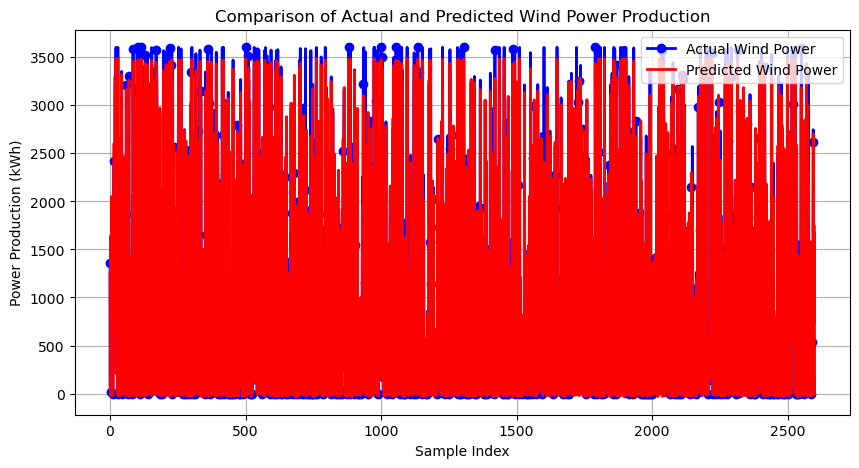

Selected models and their corresponding weights for Wind dataset:
Decision Tree: Weight - 0.1659480055871266
K Neighbors: Weight - 0.16678581429992365
Random Forest: Weight - 0.1671418578702449
XGBoost: Weight - 0.1683045789245715
Lasso: Weight - 0.165910017820544
Ridge: Weight - 0.16590972549758926

Weighted Avg Accuracy for Wind dataset: 97.618


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
  models = {
      "Decision Tree": DecisionTreeRegressor(),
      "K Neighbors": KNeighborsRegressor(),
      "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
      "XGBoost": XGBRegressor(),
      "Lasso": Lasso(),
      "Ridge": Ridge()
  }

  results = {}
  for name, model in models.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)
      mae = mean_absolute_error(y_test, y_pred)
      results[name] = {"model": model, "MSE": mse, "R-squared": r2, "MAE": mae}
  return results

# Splitting the main dataset into training and testing sets
X_wind_2 = df_wind_2.drop(["LV ActivePower (kW)"], axis=1)
y_wind_2 = df_wind_2["LV ActivePower (kW)"]
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X_wind_2, y_wind_2, test_size=0.2, random_state=42)

# Train and evaluate models for Wind dataset
results_wind = train_and_evaluate_models(X_train_wind, X_test_wind, y_train_wind, y_test_wind)

# Extract the R-squared scores from the results
scores_wind = [results_wind[model]['R-squared'] for model in results_wind]

# Find models with R-squared scores greater than the average R-squared score
avg_score_wind = sum(scores_wind) / len(scores_wind)
models_filtered_wind = [model for model, score in zip(results_wind.keys(), scores_wind) if score > 0]

# Calculate weights for each model based on R-squared
weights_wind = [(score / sum(scores_wind)) for score in scores_wind]

# Create list of (name, estimator) tuples for Wind dataset
estimators_wind = [(model, results_wind[model]['model']) for model in models_filtered_wind]

# Adjust weights based on the number of retained models
weights_wind_adjusted = weights_wind[:len(estimators_wind)]

# Create VotingRegressor ensemble for Wind dataset
ensemble_wind_2 = VotingRegressor(estimators=estimators_wind, weights=weights_wind_adjusted)

# Fit the ensemble on the training dataset
ensemble_wind_2.fit(X_train_wind, y_train_wind)

# Make predictions on the test set
yhat_wind = ensemble_wind_2.predict(X_test_wind)

# Evaluate predictions
score_wind = r2_score(y_test_wind, yhat_wind)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Set the figure size as desired

# Plotting actual wind power production
plt.plot(y_test_wind.reset_index(drop=True), label='Actual Wind Power', color='blue', linestyle='-', linewidth=2, marker='o', markevery=5)  # Use markers less frequently

# Plotting predicted wind power production
plt.plot(yhat_wind, label='Predicted Wind Power', color='red', linestyle='-', linewidth=2)  # Solid line for prediction

plt.title('Comparison of Actual and Predicted Wind Power Production')
plt.xlabel('Sample Index')
plt.ylabel('Power Production (kWh)')  # Assuming the unit is kWh, adjust accordingly
plt.legend()
plt.grid(True)
plt.show()


# Print the selected models and their corresponding weights
print("Selected models and their corresponding weights for Wind dataset:")
for model, weight in zip(models_filtered_wind, weights_wind_adjusted):
  print(f"{model}: Weight - {weight}")

print('\nWeighted Avg Accuracy for Wind dataset: %.3f' % (score_wind * 100))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Function to train and evaluate models on individual subsets
def train_and_evaluate_models_on_subsets(X_train, y_train, X_test, y_test):
  models = {
      "Decision Tree": DecisionTreeRegressor(),
      "K Neighbors": KNeighborsRegressor(),
      "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
      "XGBoost": XGBRegressor(),
      "Lasso": Lasso(),
      "Ridge": Ridge()
  }

  results = {}
  num_subsets = len(models)
  subset_size = len(X_train) // num_subsets

  model_names = list(models.keys())

  for i, (name, model) in enumerate(models.items()):
      # Determine subset indices
      start_index = i * subset_size
      if i == num_subsets - 1:  # Last subset takes the remainder of the data
          end_index = len(X_train)
      else:
          end_index = start_index + subset_size

      # Extract subset for training
      X_train_subset = X_train.iloc[start_index:end_index]
      y_train_subset = y_train.iloc[start_index:end_index]

      # Fit model on subset
      model.fit(X_train_subset, y_train_subset)
      # Predict on the common test set
      y_pred = model.predict(X_test)

      # Evaluate model
      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)
      mae = mean_absolute_error(y_test, y_pred)

      results[name] = {"MSE": mse, "R-squared": r2, "MAE": mae}

  return results

# Splitting the main dataset into training and testing sets
X_wind_3 = df_wind_3.drop(["LV ActivePower (kW)"], axis=1)
y_wind_3 = df_wind_3["LV ActivePower (kW)"]
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X_wind_3, y_wind_3, test_size=0.2, random_state=42)

# Apply the train and evaluate function on subsets
results_wind = train_and_evaluate_models_on_subsets(X_train_wind, y_train_wind, X_test_wind, y_test_wind)
print("\nWind Dataset Results:")
for model, metrics in results_wind.items():
  print(f"{model}: MSE={metrics['MSE']}, R-squared={metrics['R-squared']}, MAE={metrics['MAE']}")


Wind Dataset Results:
Decision Tree: MSE=56719.3687261995, R-squared=0.9636135800466067, MAE=81.74350517861326
K Neighbors: MSE=43621.1128223111, R-squared=0.9720163294191636, MAE=75.41571608975175
Random Forest: MSE=39150.345228123275, R-squared=0.9748844013115258, MAE=64.19488746784322
XGBoost: MSE=39510.50086266855, R-squared=0.9746533554719572, MAE=68.72670756440615
Lasso: MSE=53319.10170825281, R-squared=0.9657949079853207, MAE=121.57883723528529
Ridge: MSE=54219.07808074909, R-squared=0.9652175581492205, MAE=120.20112069446397


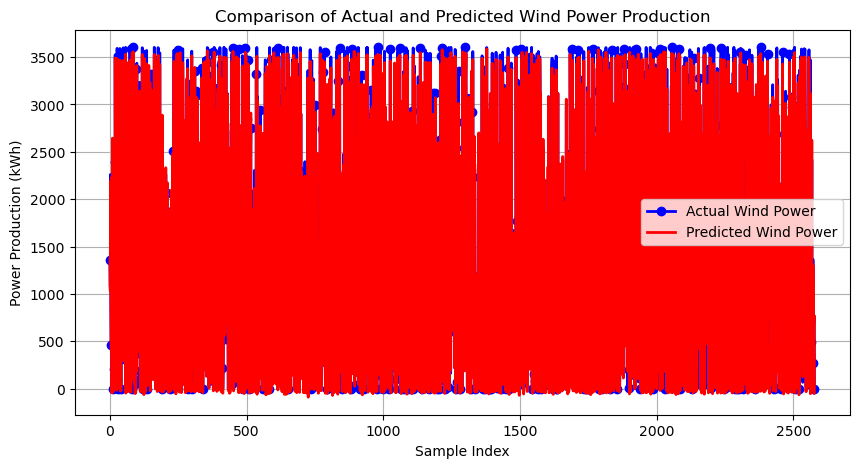

Selected models and their corresponding weights for Wind dataset:
Decision Tree: Weight - 0.16739472398339664
K Neighbors: Weight - 0.16641443893714147
Random Forest: Weight - 0.16771975383117815
XGBoost: Weight - 0.1684405320295254
Lasso: Weight - 0.16501359829787965
Ridge: Weight - 0.1650169529208786

Weighted Avg Accuracy for Wind dataset: 98.032


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
  models = {
      "Decision Tree": DecisionTreeRegressor(),
      "K Neighbors": KNeighborsRegressor(),
      "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
      "XGBoost": XGBRegressor(),
      "Lasso": Lasso(),
      "Ridge": Ridge()
  }

  results = {}
  for name, model in models.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)
      mae = mean_absolute_error(y_test, y_pred)
      results[name] = {"model": model, "MSE": mse, "R-squared": r2, "MAE": mae}
  return results

# Splitting the main dataset into training and testing sets
X_wind_3 = df_wind_3.drop(["LV ActivePower (kW)"], axis=1)
y_wind_3 = df_wind_3["LV ActivePower (kW)"]
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X_wind_3, y_wind_3, test_size=0.2, random_state=42)

# Train and evaluate models for Wind dataset
results_wind = train_and_evaluate_models(X_train_wind, X_test_wind, y_train_wind, y_test_wind)

# Extract the R-squared scores from the results
scores_wind = [results_wind[model]['R-squared'] for model in results_wind]

# Find models with R-squared scores greater than the average R-squared score
avg_score_wind = sum(scores_wind) / len(scores_wind)
models_filtered_wind = [model for model, score in zip(results_wind.keys(), scores_wind) if score > 0]

# Calculate weights for each model based on R-squared
weights_wind = [(score / sum(scores_wind)) for score in scores_wind]

# Create list of (name, estimator) tuples for Wind dataset
estimators_wind = [(model, results_wind[model]['model']) for model in models_filtered_wind]

# Adjust weights based on the number of retained models
weights_wind_adjusted = weights_wind[:len(estimators_wind)]

# Create VotingRegressor ensemble for Wind dataset
ensemble_wind_3 = VotingRegressor(estimators=estimators_wind, weights=weights_wind_adjusted)

# Fit the ensemble on the training dataset
ensemble_wind_3.fit(X_train_wind, y_train_wind)

# Make predictions on the test set
yhat_wind = ensemble_wind_3.predict(X_test_wind)

# Evaluate predictions
score_wind = r2_score(y_test_wind, yhat_wind)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Set the figure size as desired

# Plotting actual wind power production
plt.plot(y_test_wind.reset_index(drop=True), label='Actual Wind Power', color='blue', linestyle='-', linewidth=2, marker='o', markevery=5)  # Use markers less frequently

# Plotting predicted wind power production
plt.plot(yhat_wind, label='Predicted Wind Power', color='red', linestyle='-', linewidth=2)  # Solid line for prediction

plt.title('Comparison of Actual and Predicted Wind Power Production')
plt.xlabel('Sample Index')
plt.ylabel('Power Production (kWh)')  # Assuming the unit is kWh, adjust accordingly
plt.legend()
plt.grid(True)
plt.show()


# Print the selected models and their corresponding weights
print("Selected models and their corresponding weights for Wind dataset:")
for model, weight in zip(models_filtered_wind, weights_wind_adjusted):
  print(f"{model}: Weight - {weight}")

print('\nWeighted Avg Accuracy for Wind dataset: %.3f' % (score_wind * 100))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Function to train and evaluate models on individual subsets
def train_and_evaluate_models_on_subsets(X_train, y_train, X_test, y_test):
  models = {
      "Decision Tree": DecisionTreeRegressor(),
      "K Neighbors": KNeighborsRegressor(),
      "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
      "XGBoost": XGBRegressor(),
      "Lasso": Lasso(),
      "Ridge": Ridge()
  }

  results = {}
  num_subsets = len(models)
  subset_size = len(X_train) // num_subsets

  model_names = list(models.keys())

  for i, (name, model) in enumerate(models.items()):
      # Determine subset indices
      start_index = i * subset_size
      if i == num_subsets - 1:  # Last subset takes the remainder of the data
          end_index = len(X_train)
      else:
          end_index = start_index + subset_size

      # Extract subset for training
      X_train_subset = X_train.iloc[start_index:end_index]
      y_train_subset = y_train.iloc[start_index:end_index]

      # Fit model on subset
      model.fit(X_train_subset, y_train_subset)
      # Predict on the common test set
      y_pred = model.predict(X_test)

      # Evaluate model
      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)
      mae = mean_absolute_error(y_test, y_pred)

      results[name] = {"MSE": mse, "R-squared": r2, "MAE": mae}

  return results

# Splitting the main dataset into training and testing sets
X_wind_4 = df_wind_4.drop(["LV ActivePower (kW)"], axis=1)
y_wind_4 = df_wind_4["LV ActivePower (kW)"]
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X_wind_4, y_wind_4, test_size=0.2, random_state=42)

# Apply the train and evaluate function on subsets
results_wind = train_and_evaluate_models_on_subsets(X_train_wind, y_train_wind, X_test_wind, y_test_wind)
print("\nWind Dataset Results:")
for model, metrics in results_wind.items():
  print(f"{model}: MSE={metrics['MSE']}, R-squared={metrics['R-squared']}, MAE={metrics['MAE']}")


Wind Dataset Results:
Decision Tree: MSE=106591.43808636913, R-squared=0.9379259622174634, MAE=137.37137025232565
K Neighbors: MSE=141352.23367159505, R-squared=0.9176828453476078, MAE=172.3451310920085
Random Forest: MSE=94724.87043665418, R-squared=0.9448365150898298, MAE=136.32389898299715
XGBoost: MSE=59075.31527908452, R-squared=0.9655972053808128, MAE=108.75768188169249
Lasso: MSE=140986.00556635758, R-squared=0.9178961200500573, MAE=209.967687243295
Ridge: MSE=140697.02522360964, R-squared=0.9180644091456562, MAE=210.74353100259853


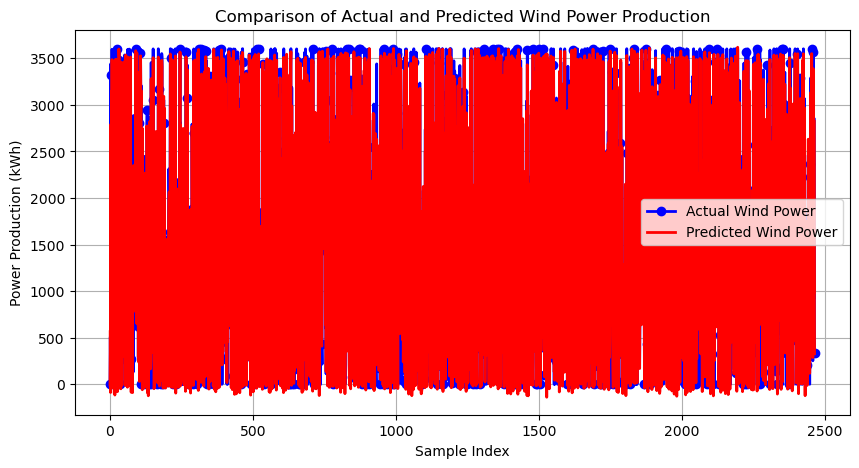

Selected models and their corresponding weights for Wind dataset:
Decision Tree: Weight - 0.16873765929373183
K Neighbors: Weight - 0.1648272950070318
Random Forest: Weight - 0.17180800866283338
XGBoost: Weight - 0.17303987876773227
Lasso: Weight - 0.1607949471100333
Ridge: Weight - 0.16079221115863737

Weighted Avg Accuracy for Wind dataset: 97.139


In [ ]:
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
  models = {
      "Decision Tree": DecisionTreeRegressor(),
      "K Neighbors": KNeighborsRegressor(),
      "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
      "XGBoost": XGBRegressor(),
      "Lasso": Lasso(),
      "Ridge": Ridge()
  }

  results = {}
  for name, model in models.items():
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      mse = mean_squared_error(y_test, y_pred)
      r2 = r2_score(y_test, y_pred)
      mae = mean_absolute_error(y_test, y_pred)
      results[name] = {"model": model, "MSE": mse, "R-squared": r2, "MAE": mae}
  return results

# Splitting the main dataset into training and testing sets
X_wind_4 = df_wind_4.drop(["LV ActivePower (kW)"], axis=1)
y_wind_4 = df_wind_4["LV ActivePower (kW)"]
X_train_wind, X_test_wind, y_train_wind, y_test_wind = train_test_split(X_wind_4, y_wind_4, test_size=0.2, random_state=42)

# Train and evaluate models for Wind dataset
results_wind = train_and_evaluate_models(X_train_wind, X_test_wind, y_train_wind, y_test_wind)

# Extract the R-squared scores from the results
scores_wind = [results_wind[model]['R-squared'] for model in results_wind]

# Find models with R-squared scores greater than the average R-squared score
avg_score_wind = sum(scores_wind) / len(scores_wind)
models_filtered_wind = [model for model, score in zip(results_wind.keys(), scores_wind) if score > 0]

# Calculate weights for each model based on R-squared
weights_wind = [(score / sum(scores_wind)) for score in scores_wind]

# Create list of (name, estimator) tuples for Wind dataset
estimators_wind = [(model, results_wind[model]['model']) for model in models_filtered_wind]

# Adjust weights based on the number of retained models
weights_wind_adjusted = weights_wind[:len(estimators_wind)]

# Create VotingRegressor ensemble for Wind dataset
ensemble_wind_4 = VotingRegressor(estimators=estimators_wind, weights=weights_wind_adjusted)

# Fit the ensemble on the training dataset
ensemble_wind_4.fit(X_train_wind, y_train_wind)

# Make predictions on the test set
yhat_wind = ensemble_wind_4.predict(X_test_wind)

# Evaluate predictions
score_wind = r2_score(y_test_wind, yhat_wind)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))  # Set the figure size as desired

# Plotting actual wind power production
plt.plot(y_test_wind.reset_index(drop=True), label='Actual Wind Power', color='blue', linestyle='-', linewidth=2, marker='o', markevery=5)  # Use markers less frequently

# Plotting predicted wind power production
plt.plot(yhat_wind, label='Predicted Wind Power', color='red', linestyle='-', linewidth=2)  # Solid line for prediction

plt.title('Comparison of Actual and Predicted Wind Power Production')
plt.xlabel('Sample Index')
plt.ylabel('Power Production (kWh)')  # Assuming the unit is kWh, adjust accordingly
plt.legend()
plt.grid(True)
plt.show()


# Print the selected models and their corresponding weights
print("Selected models and their corresponding weights for Wind dataset:")
for model, weight in zip(models_filtered_wind, weights_wind_adjusted):
  print(f"{model}: Weight - {weight}")

print('\nWeighted Avg Accuracy for Wind dataset: %.3f' % (score_wind * 100))

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import VotingRegressor

# Function to calculate solar and wind power based on user inputs
def calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar, ensemble_wind):
    # Extract user inputs
    # Calculate solar and wind power using trained ML models
    solar_inputs = np.array([[user_inputs_solar['WindSpeed'], user_inputs_solar['Sunshine'], user_inputs_solar['AirPressure'],
                               user_inputs_solar['Radiation'], user_inputs_solar['AirTemperature'], user_inputs_solar['RelativeAirHumidity'],
                               user_inputs_solar['MONTH'], user_inputs_solar['DAY'], user_inputs_solar['hour']]])
    wind_inputs = np.array([[user_inputs_wind['Wind Speed (m/s)'], user_inputs_wind['Theoretical_Power_Curve (KWh)'],
                              user_inputs_wind['Wind Direction (°)'],user_inputs_wind['MONTH'],
                              user_inputs_wind['DAY'], user_inputs_wind['hour']]])

    # Calculate solar and wind power using trained ML models
    solar_power = ensemble_solar_1.predict(solar_inputs)
    wind_power = ensemble_wind_1.predict(wind_inputs)

    return solar_power, wind_power

# Function to determine optimal resource allocation
def allocate_resources(user_energy_requirement, solar_power, wind_power):
    if solar_power >= user_energy_requirement and solar_power <= wind_power:
        return 'Solar', solar_power
    elif wind_power >= user_energy_requirement and wind_power < solar_power:
        return 'Wind', wind_power
    else:
        # In case neither solar nor wind can meet the energy requirement, calculate deficit
        total_power = solar_power + wind_power
        solar_percentage = (solar_power / total_power) * 100
        wind_percentage = (wind_power / total_power) * 100
        deficit = user_energy_requirement - total_power
        return 'Combination (Solar & Wind)', deficit, solar_percentage, wind_percentage

# Sample user inputs (replace with actual user input mechanism)
user_inputs_solar = {
    'WindSpeed': 3.5,
    'Sunshine': 42,
    'AirPressure': 90,
    'Radiation': 319,
    'AirTemperature': 3.8,
    'RelativeAirHumidity': 68,
    'MONTH': 3,
    'DAY': 4,
    'hour': 13
}
user_inputs_wind = {
    'Wind Speed (m/s)': 3.6,
    'Theoretical_Power_Curve (KWh)': 53.12,
    'Wind Direction (°)': 340,
    'MONTH': 3,
    'DAY': 4,
    'hour': 13
}
# Sample energy requirement (replace with actual user input mechanism)
user_energy_requirement = 2000  # Sample user input for energy requirement

# Calculate solar and wind power using trained ML models
solar_power, wind_power = calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar_1, ensemble_wind_1)

# Allocate resources to meet user's energy requirement
allocation_source, allocated_power, solar_percentage, wind_percentage = allocate_resources(user_energy_requirement, solar_power, wind_power)

# Calculate the remaining power to be generated
remaining_power = user_energy_requirement - abs(allocated_power)

# Print the optimal resource allocation
print(f"Resource Allocation:")
print(f"Energy Requirement: {user_energy_requirement}")
print(f"Solar Power Generated: {solar_power}")
print(f"Wind Power Generated: {wind_power}")
print(f"Allocation Source: {allocation_source}")
print(f"Solar Percentage: {solar_percentage}%")
print(f"Wind Percentage: {wind_percentage}%")
print(f"Deficit: {allocated_power}")

Resource Allocation:
Energy Requirement: 2000
Solar Power Generated: [1852.79376588]
Wind Power Generated: [50.88548262]
Allocation Source: Combination (Solar & Wind)
Solar Percentage: [97.32699284]%
Wind Percentage: [2.67300716]%
Deficit: [96.32075149]


Stopping search: maximum iterations reached --> 100


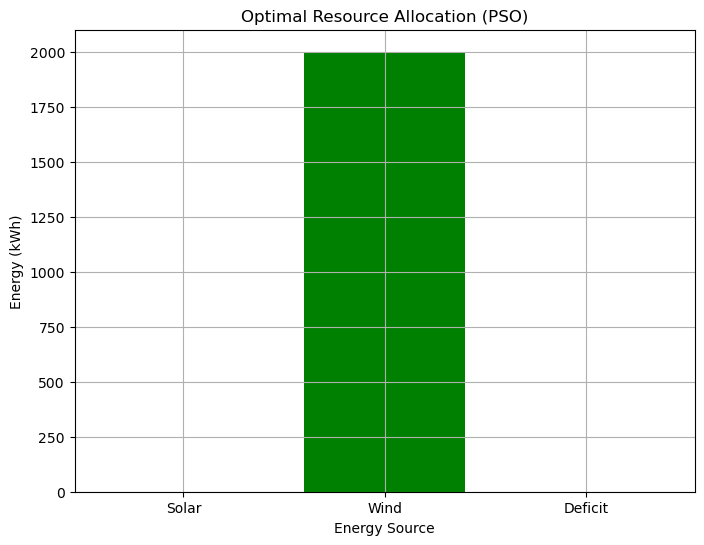

Optimal Resource Allocation (PSO):
Solar Power Generated: 0.00 kWh
Wind Power Generated: 2000.00 kWh
Total Power Generated: 2000.00 kWh
Energy Requirement: 2000 kWh
Deficit: 0.00 kWh
Allocation Source: Combined (Solar & Wind)
Solar Percentage: 0.00%
Wind Percentage: 100.00%


In [ ]:
import numpy as np
import pyswarm as ps

# Function to calculate solar and wind power based on user inputs
def calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar, ensemble_wind):
    # Extract user inputs
    # Calculate solar and wind power using trained ML models
    solar_inputs = np.array([[user_inputs_solar['WindSpeed'], user_inputs_solar['Sunshine'], user_inputs_solar['AirPressure'],
                               user_inputs_solar['Radiation'], user_inputs_solar['AirTemperature'], user_inputs_solar['RelativeAirHumidity'],
                               user_inputs_solar['MONTH'], user_inputs_solar['DAY'], user_inputs_solar['hour']]])
    wind_inputs = np.array([[user_inputs_wind['Wind Speed (m/s)'], user_inputs_wind['Theoretical_Power_Curve (KWh)'],
                              user_inputs_wind['Wind Direction (°)'],user_inputs_wind['MONTH'],
                              user_inputs_wind['DAY'], user_inputs_wind['hour']]])

    # Calculate solar and wind power using trained ML models
    solar_power = ensemble_solar_1.predict(solar_inputs)
    wind_power = ensemble_wind_1.predict(wind_inputs)

    return solar_power, wind_power

# Function to determine optimal resource allocation using PSO
def allocate_resources(user_energy_requirement, solar_power, wind_power):
    total_power = solar_power + wind_power
    solar_percentage = (solar_power / total_power) * 100
    wind_percentage = (wind_power / total_power) * 100
    deficit = user_energy_requirement - total_power

    if deficit <= 0:
        return 'Combined (Solar & Wind)', 0, solar_percentage, wind_percentage
    else:
        return 'Combined (Solar & Wind)', deficit, solar_percentage, wind_percentage

# Sample user inputs (replace with actual user input mechanism)
user_inputs_solar = {
    'WindSpeed': 3.5,
    'Sunshine': 42,
    'AirPressure': 90,
    'Radiation': 319,
    'AirTemperature': 3.8,
    'RelativeAirHumidity': 68,
    'MONTH': 3,
    'DAY': 4,
    'hour': 13
}
user_inputs_wind = {
    'Wind Speed (m/s)': 3.6,
    'Theoretical_Power_Curve (KWh)': 53.12,
    'Wind Direction (°)': 340,
    'MONTH': 3,
    'DAY': 4,
    'hour': 13
}

# Sample energy requirement (replace with actual user input mechanism)
user_energy_requirement = 2000  # Sample user input for energy requirement

# Calculate solar and wind power using trained ML models
solar_power, wind_power = calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar_1, ensemble_wind_1)

# Optimize resource allocation using PSO
def objective_function(x, user_energy_requirement, solar_power, wind_power):
    solar_allocated = x[0]
    wind_allocated = x[1]
    deficit = user_energy_requirement - (solar_allocated + wind_allocated)
    return deficit ** 2

lb = [0, 0]  # Lower bounds for solar and wind allocation
ub = [user_energy_requirement, user_energy_requirement]  # Upper bounds for solar and wind allocation
x_optimal, _ = ps.pso(objective_function, lb, ub, args=(user_energy_requirement, solar_power, wind_power))

solar_allocated, wind_allocated = x_optimal

# Allocate resources based on optimized allocation
allocation_source, deficit, solar_percentage, wind_percentage = allocate_resources(user_energy_requirement, solar_allocated, wind_allocated)

# Assuming solar_allocated, wind_allocated, and user_energy_requirement are variables containing allocation results

# Visualizing resource allocation
plt.figure(figsize=(8, 6))
labels = ['Solar', 'Wind', 'Deficit']
values = [solar_allocated, wind_allocated, max(0, user_energy_requirement - (solar_allocated + wind_allocated))]
colors = ['orange', 'green', 'red']

plt.bar(labels, values, color=colors)
plt.xlabel('Energy Source')
plt.ylabel('Energy (kWh)')
plt.title('Optimal Resource Allocation (PSO)')
plt.grid(True)

plt.show()

# Print the optimal resource allocation
print("Optimal Resource Allocation (PSO):")
print(f"Solar Power Generated: {solar_allocated:.2f} kWh")
print(f"Wind Power Generated: {wind_allocated:.2f} kWh")
print(f"Total Power Generated: {(solar_allocated + wind_allocated):.2f} kWh")
print(f"Energy Requirement: {user_energy_requirement} kWh")
print(f"Deficit: {deficit:.2f} kWh")
print(f"Allocation Source: {allocation_source}")
print(f"Solar Percentage: {solar_percentage:.2f}%")
print(f"Wind Percentage: {wind_percentage:.2f}%")


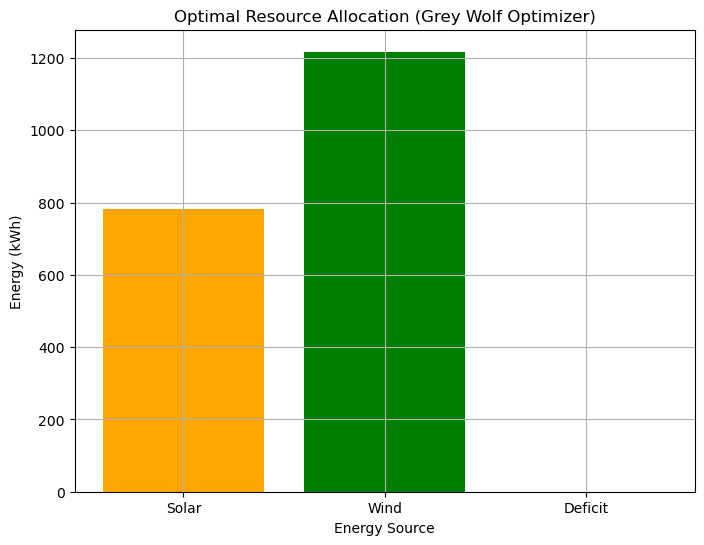

Optimal Resource Allocation (Grey Wolf Optimizer):
Solar Power Generated: 782.62 kWh
Wind Power Generated: 1217.38 kWh
Total Power Generated: 2000.00 kWh
Energy Requirement: 2000 kWh
Deficit: 0.00 kWh
Allocation Source: Combined (Solar & Wind)
Solar Percentage: 39.13%
Wind Percentage: 60.87%


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to calculate solar and wind power based on user inputs
def calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar, ensemble_wind):
    # Extract user inputs
    # Calculate solar and wind power using trained ML models
    solar_inputs = np.array([[user_inputs_solar['WindSpeed'], user_inputs_solar['Sunshine'], user_inputs_solar['AirPressure'],
                               user_inputs_solar['Radiation'], user_inputs_solar['AirTemperature'], user_inputs_solar['RelativeAirHumidity'],
                               user_inputs_solar['MONTH'], user_inputs_solar['DAY'], user_inputs_solar['hour']]])
    wind_inputs = np.array([[user_inputs_wind['Wind Speed (m/s)'], user_inputs_wind['Theoretical_Power_Curve (KWh)'],
                              user_inputs_wind['Wind Direction (°)'],user_inputs_wind['MONTH'],
                              user_inputs_wind['DAY'], user_inputs_wind['hour']]])

    # Calculate solar and wind power using trained ML models
    solar_power = ensemble_solar_1.predict(solar_inputs)
    wind_power = ensemble_wind_1.predict(wind_inputs)

    return solar_power, wind_power

# Function to determine optimal resource allocation using Grey Wolf Optimizer
def allocate_resources(user_energy_requirement, solar_allocated):
    wind_allocated = user_energy_requirement - solar_allocated
    return 'Combined (Solar & Wind)', 0, (solar_allocated / user_energy_requirement) * 100, (wind_allocated / user_energy_requirement) * 100

# Objective function for Grey Wolf Optimizer
def objective_function(x, user_energy_requirement, solar_power, wind_power):
    solar_allocated = x
    wind_allocated = user_energy_requirement - solar_allocated
    deficit = user_energy_requirement - (solar_allocated + wind_allocated)
    return deficit ** 2

def grey_wolf_optimizer(objective_function, lb, ub, max_iterations, user_energy_requirement, solar_power, wind_power):
    positions = [random.uniform(lb[i], ub[i]) for i in range(len(lb))]
    alpha_pos = positions[0]

    for _ in range(max_iterations):
        for i in range(len(positions)):
            A1 = 2 * (random.random())
            C1 = 2 * (random.random())

            D_alpha = abs(C1 * alpha_pos - positions[i])
            X1 = alpha_pos - A1 * D_alpha

            positions[i] = X1

    return positions[np.argmin([objective_function(position, user_energy_requirement, solar_power, wind_power) for position in positions])]

# Sample user inputs
user_inputs_solar = {
    'WindSpeed': 3.5,
    'Sunshine': 42,
    'AirPressure': 90,
    'Radiation': 319,
    'AirTemperature': 3.8,
    'RelativeAirHumidity': 68,
    'MONTH': 3,
    'DAY': 4,
    'hour': 13
}
user_inputs_wind = {
    'Wind Speed (m/s)': 3.6,
    'Theoretical_Power_Curve (KWh)': 53.12,
    'Wind Direction (°)': 340,
    'MONTH': 3,
    'DAY': 4,
    'hour': 13
}

# Sample energy requirement
user_energy_requirement = 2000  # Sample user input for energy requirement

solar_power, wind_power = calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar_1, ensemble_wind_1)

# Define bounds for solar allocation
lb = [0]
ub = [user_energy_requirement]

# Run Grey Wolf Optimizer
best_position = grey_wolf_optimizer(objective_function, lb, ub, max_iterations=100, user_energy_requirement=user_energy_requirement, solar_power=solar_power, wind_power=wind_power)

# Extract solar_allocated and wind_allocated from best_position
solar_allocated = best_position
allocation_source, deficit, solar_percentage, wind_percentage = allocate_resources(user_energy_requirement, solar_allocated)

# Visualize resource allocation
plt.figure(figsize=(8, 6))
labels = ['Solar', 'Wind', 'Deficit']
values = [solar_allocated, user_energy_requirement - solar_allocated, deficit]
colors = ['orange', 'green', 'red']

plt.bar(labels, values, color=colors)
plt.xlabel('Energy Source')
plt.ylabel('Energy (kWh)')
plt.title('Optimal Resource Allocation (Grey Wolf Optimizer)')
plt.grid(True)

plt.show()

# Print the optimal resource allocation
print("Optimal Resource Allocation (Grey Wolf Optimizer):")
print(f"Solar Power Generated: {solar_allocated:.2f} kWh")
print(f"Wind Power Generated: {user_energy_requirement - solar_allocated:.2f} kWh")
print(f"Total Power Generated: {user_energy_requirement:.2f} kWh")
print(f"Energy Requirement: {user_energy_requirement} kWh")
print(f"Deficit: {deficit:.2f} kWh")
print(f"Allocation Source: {allocation_source}")
print(f"Solar Percentage: {solar_percentage:.2f}%")
print(f"Wind Percentage: {wind_percentage:.2f}%")


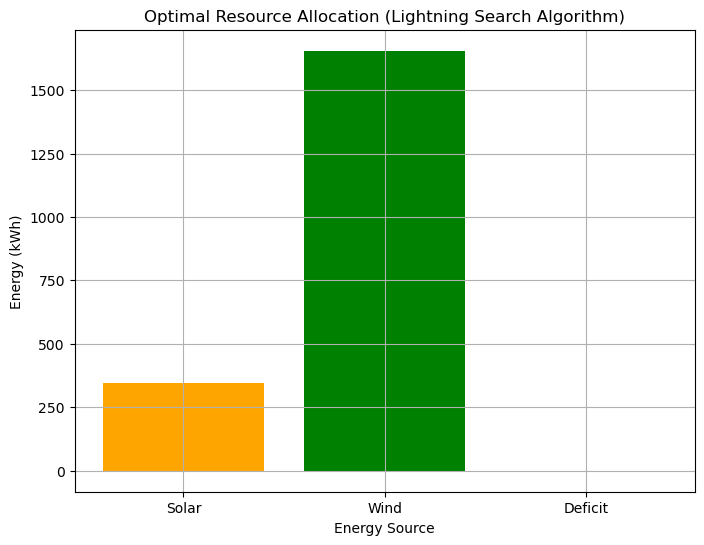

Optimal Resource Allocation (Lightning Search Algorithm):
Solar Power Generated: 345.13 kWh
Wind Power Generated: 1655.39 kWh
Total Power Generated: 2000.52 kWh
Energy Requirement: 2000 kWh
Deficit: -0.52 kWh
Allocation Source: Combined (Solar & Wind)
Solar Percentage: 17.26%
Wind Percentage: 82.77%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate solar and wind power based on user inputs
def calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar, ensemble_wind):
    # Extract user inputs
    # Calculate solar and wind power using trained ML models
    solar_inputs = np.array([[user_inputs_solar['WindSpeed'], user_inputs_solar['Sunshine'], user_inputs_solar['AirPressure'],
                               user_inputs_solar['Radiation'], user_inputs_solar['AirTemperature'], user_inputs_solar['RelativeAirHumidity'],
                               user_inputs_solar['MONTH'], user_inputs_solar['DAY'], user_inputs_solar['hour']]])
    wind_inputs = np.array([[user_inputs_wind['Wind Speed (m/s)'], user_inputs_wind['Theoretical_Power_Curve (KWh)'],
                              user_inputs_wind['Wind Direction (°)'],user_inputs_wind['MONTH'],
                              user_inputs_wind['DAY'], user_inputs_wind['hour']]])

    # Calculate solar and wind power using trained ML models
    solar_power = ensemble_solar_1.predict(solar_inputs)
    wind_power = ensemble_wind_1.predict(wind_inputs)

    return solar_power, wind_power

# Function to determine optimal resource allocation using Lightning Search Algorithm
def allocate_resources(user_energy_requirement, best_position):
    solar_allocated, wind_allocated = best_position
    deficit = user_energy_requirement - (solar_allocated + wind_allocated)
    return 'Combined (Solar & Wind)', deficit, (solar_allocated / user_energy_requirement) * 100, (wind_allocated / user_energy_requirement) * 100

# Objective function for Lightning Search Algorithm
def objective_function(x, user_energy_requirement, solar_power, wind_power):
    solar_allocated, wind_allocated = x
    deficit = user_energy_requirement - (solar_allocated + wind_allocated)
    return deficit ** 2

# Lightning Search Algorithm
def lightning_search_algorithm(objective_function, lb, ub, max_iterations, user_energy_requirement, solar_power, wind_power):
    # Initialize population
    population = np.random.uniform(lb, ub, size=(max_iterations, len(lb)))

    # Iteration loop
    for i in range(max_iterations):
        # Mutation
        mutation_rate = 0.1  # Adjust as needed
        for j in range(len(population[i])):
            if np.random.rand() < mutation_rate:
                population[i, j] = np.random.uniform(lb[j], ub[j])

        # Crossover
        crossover_rate = 0.2  # Adjust as needed
        if np.random.rand() < crossover_rate:
            parent1 = population[np.random.randint(0, max_iterations)]
            parent2 = population[np.random.randint(0, max_iterations)]
            crossover_point = np.random.randint(low=1, high=len(lb))
            child = np.copy(parent1)
            child[crossover_point:] = parent2[crossover_point:]
            population[i] = child

        # Selection
        best_individual_index = np.argmin([objective_function(p, user_energy_requirement, solar_power, wind_power) for p in population])
        best_individual = population[best_individual_index]

    return best_individual

user_inputs_solar = {
    'WindSpeed': 3.5,
    'Sunshine': 42,
    'AirPressure': 90,
    'Radiation': 319,
    'AirTemperature': 3.8,
    'RelativeAirHumidity': 68,
    'MONTH': 3,
    'DAY': 4,
    'hour': 13
}
user_inputs_wind = {
    'Wind Speed (m/s)': 3.6,
    'Theoretical_Power_Curve (KWh)': 53.12,
    'Wind Direction (°)': 340,
    'MONTH': 3,
    'DAY': 4,
    'hour': 13
}
# Sample energy requirement
user_energy_requirement = 2000  # Sample user input for energy requirement

# Sample solar and wind power
solar_power, wind_power = calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar_1, ensemble_wind_1)

# Define bounds for solar and wind allocation
lb = [0, 0]
ub = [user_energy_requirement, user_energy_requirement]

# Run Lightning Search Algorithm
best_position = lightning_search_algorithm(objective_function, lb, ub, max_iterations=100, user_energy_requirement=user_energy_requirement, solar_power=solar_power, wind_power=wind_power)

# Extract solar_allocated and wind_allocated from best_position
solar_allocated, wind_allocated = best_position
allocation_source, deficit, solar_percentage, wind_percentage = allocate_resources(user_energy_requirement, best_position)

# Visualize resource allocation
plt.figure(figsize=(8, 6))
labels = ['Solar', 'Wind', 'Deficit']
values = [solar_allocated, wind_allocated, deficit]
colors = ['orange', 'green', 'red']

plt.bar(labels, values, color=colors)
plt.xlabel('Energy Source')
plt.ylabel('Energy (kWh)')
plt.title('Optimal Resource Allocation (Lightning Search Algorithm)')
plt.grid(True)

plt.show()

# Print the optimal resource allocation
print("Optimal Resource Allocation (Lightning Search Algorithm):")
print(f"Solar Power Generated: {solar_allocated:.2f} kWh")
print(f"Wind Power Generated: {wind_allocated:.2f} kWh")
print(f"Total Power Generated: {solar_allocated+wind_allocated:.2f} kWh")
print(f"Energy Requirement: {user_energy_requirement} kWh")
print(f"Deficit: {deficit:.2f} kWh")
print(f"Allocation Source: {allocation_source}")
print(f"Solar Percentage: {solar_percentage:.2f}%")
print(f"Wind Percentage: {wind_percentage:.2f}%")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import VotingRegressor

# Function to calculate solar and wind power based on user inputs
def calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar, ensemble_wind):
    # Extract user inputs
    # Calculate solar and wind power using trained ML models
    solar_inputs = np.array([[user_inputs_solar['WindSpeed'], user_inputs_solar['Sunshine'], user_inputs_solar['AirPressure'],
                               user_inputs_solar['Radiation'], user_inputs_solar['AirTemperature'], user_inputs_solar['RelativeAirHumidity'],
                               user_inputs_solar['MONTH'], user_inputs_solar['DAY'], user_inputs_solar['hour']]])
    wind_inputs = np.array([[user_inputs_wind['Wind Speed (m/s)'], user_inputs_wind['Theoretical_Power_Curve (KWh)'],
                              user_inputs_wind['Wind Direction (°)'],user_inputs_wind['MONTH'],
                              user_inputs_wind['DAY'], user_inputs_wind['hour']]])

    # Calculate solar and wind power using trained ML models
    solar_power = ensemble_solar_2.predict(solar_inputs)
    wind_power = ensemble_wind_2.predict(wind_inputs)

    return solar_power, wind_power

# Function to determine optimal resource allocation
def allocate_resources(user_energy_requirement, solar_power, wind_power):
    if solar_power >= user_energy_requirement and solar_power <= wind_power:
        return 'Solar', solar_power
    elif wind_power >= user_energy_requirement and wind_power < solar_power:
        return 'Wind', wind_power
    else:
        # In case neither solar nor wind can meet the energy requirement, calculate deficit
        total_power = solar_power + wind_power
        solar_percentage = (solar_power / total_power) * 100
        wind_percentage = (wind_power / total_power) * 100
        deficit = user_energy_requirement - total_power
        return 'Combination (Solar & Wind)', deficit, solar_percentage, wind_percentage

# Sample user inputs (replace with actual user input mechanism)
user_inputs_solar = {
    'WindSpeed': 2.6,
    'Sunshine': 55,
    'AirPressure': 1010,
    'Radiation': 508,
    'AirTemperature': 16,
    'RelativeAirHumidity': 50,
    'MONTH': 4,
    'DAY': 2,
    'hour': 15
}
user_inputs_wind = {
    'Wind Speed (m/s)': 2.6,
    'Theoretical_Power_Curve (KWh)': 230,
    'Wind Direction (°)': 240,
    'MONTH': 4,
    'DAY': 2,
    'hour': 15
}
# Sample energy requirement (replace with actual user input mechanism)
user_energy_requirement = 2000  # Sample user input for energy requirement

# Calculate solar and wind power using trained ML models
solar_power, wind_power = calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar_2, ensemble_wind_2)

# Allocate resources to meet user's energy requirement
allocation_source, allocated_power, solar_percentage, wind_percentage = allocate_resources(user_energy_requirement, solar_power, wind_power)

# Calculate the remaining power to be generated
remaining_power = user_energy_requirement - abs(allocated_power)

# Print the optimal resource allocation
print(f"Resource Allocation:")
print(f"Energy Requirement: {user_energy_requirement}")
print(f"Solar Power Generated: {solar_power}")
print(f"Wind Power Generated: {wind_power}")
print(f"Allocation Source: {allocation_source}")
print(f"Solar Percentage: {solar_percentage}%")
print(f"Wind Percentage: {wind_percentage}%")
print(f"Deficit: {allocated_power}")

Resource Allocation:
Energy Requirement: 2000
Solar Power Generated: [1864.52255616]
Wind Power Generated: [147.84326358]
Allocation Source: Combination (Solar & Wind)
Solar Percentage: [92.65326105]%
Wind Percentage: [7.34673895]%
Deficit: [-12.36581975]


Stopping search: maximum iterations reached --> 100


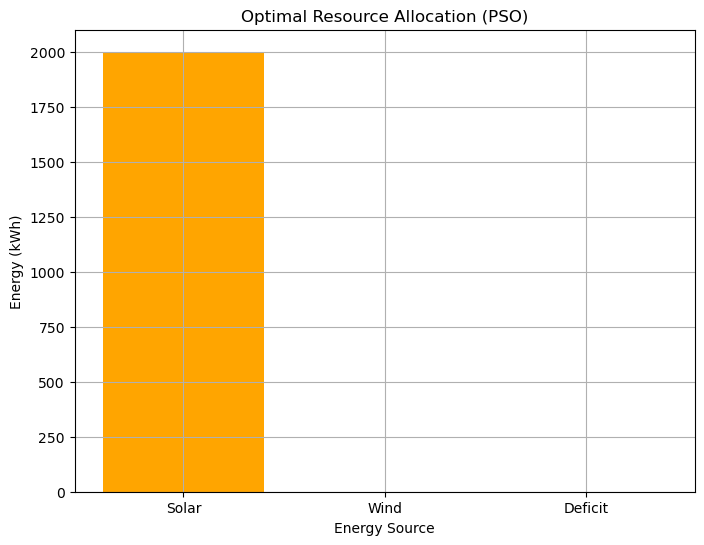

Optimal Resource Allocation (PSO):
Solar Power Generated: 2000.00 kWh
Wind Power Generated: 0.00 kWh
Total Power Generated: 2000.00 kWh
Energy Requirement: 2000 kWh
Deficit: 0.00 kWh
Allocation Source: Combined (Solar & Wind)
Solar Percentage: 100.00%
Wind Percentage: 0.00%


In [ ]:
import numpy as np
import pyswarm as ps

# Function to calculate solar and wind power based on user inputs
def calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar, ensemble_wind):
    # Extract user inputs
    # Calculate solar and wind power using trained ML models
    solar_inputs = np.array([[user_inputs_solar['WindSpeed'], user_inputs_solar['Sunshine'], user_inputs_solar['AirPressure'],
                               user_inputs_solar['Radiation'], user_inputs_solar['AirTemperature'], user_inputs_solar['RelativeAirHumidity'],
                               user_inputs_solar['MONTH'], user_inputs_solar['DAY'], user_inputs_solar['hour']]])
    wind_inputs = np.array([[user_inputs_wind['Wind Speed (m/s)'], user_inputs_wind['Theoretical_Power_Curve (KWh)'],
                              user_inputs_wind['Wind Direction (°)'],user_inputs_wind['MONTH'],
                              user_inputs_wind['DAY'], user_inputs_wind['hour']]])

    # Calculate solar and wind power using trained ML models
    solar_power = ensemble_solar_2.predict(solar_inputs)
    wind_power = ensemble_wind_2.predict(wind_inputs)

    return solar_power, wind_power

# Function to determine optimal resource allocation using PSO
def allocate_resources(user_energy_requirement, solar_power, wind_power):
    total_power = solar_power + wind_power
    solar_percentage = (solar_power / total_power) * 100
    wind_percentage = (wind_power / total_power) * 100
    deficit = user_energy_requirement - total_power

    if deficit <= 0:
        return 'Combined (Solar & Wind)', 0, solar_percentage, wind_percentage
    else:
        return 'Combined (Solar & Wind)', deficit, solar_percentage, wind_percentage

# Sample user inputs (replace with actual user input mechanism)
user_inputs_solar = {
    'WindSpeed': 2.6,
    'Sunshine': 55,
    'AirPressure': 1010,
    'Radiation': 508,
    'AirTemperature': 16,
    'RelativeAirHumidity': 50,
    'MONTH': 4,
    'DAY': 2,
    'hour': 15
}
user_inputs_wind = {
    'Wind Speed (m/s)': 2.6,
    'Theoretical_Power_Curve (KWh)': 230,
    'Wind Direction (°)': 240,
    'MONTH': 4,
    'DAY': 2,
    'hour': 15
}

# Sample energy requirement (replace with actual user input mechanism)
user_energy_requirement = 2000  # Sample user input for energy requirement

# Calculate solar and wind power using trained ML models
solar_power, wind_power = calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar_2, ensemble_wind_2)

# Optimize resource allocation using PSO
def objective_function(x, user_energy_requirement, solar_power, wind_power):
    solar_allocated = x[0]
    wind_allocated = x[1]
    deficit = user_energy_requirement - (solar_allocated + wind_allocated)
    return deficit ** 2

lb = [0, 0]  # Lower bounds for solar and wind allocation
ub = [user_energy_requirement, user_energy_requirement]  # Upper bounds for solar and wind allocation
x_optimal, _ = ps.pso(objective_function, lb, ub, args=(user_energy_requirement, solar_power, wind_power))

solar_allocated, wind_allocated = x_optimal

# Allocate resources based on optimized allocation
allocation_source, deficit, solar_percentage, wind_percentage = allocate_resources(user_energy_requirement, solar_allocated, wind_allocated)

# Assuming solar_allocated, wind_allocated, and user_energy_requirement are variables containing allocation results

# Visualizing resource allocation
plt.figure(figsize=(8, 6))
labels = ['Solar', 'Wind', 'Deficit']
values = [solar_allocated, wind_allocated, max(0, user_energy_requirement - (solar_allocated + wind_allocated))]
colors = ['orange', 'green', 'red']

plt.bar(labels, values, color=colors)
plt.xlabel('Energy Source')
plt.ylabel('Energy (kWh)')
plt.title('Optimal Resource Allocation (PSO)')
plt.grid(True)

plt.show()

# Print the optimal resource allocation
print("Optimal Resource Allocation (PSO):")
print(f"Solar Power Generated: {solar_allocated:.2f} kWh")
print(f"Wind Power Generated: {wind_allocated:.2f} kWh")
print(f"Total Power Generated: {(solar_allocated + wind_allocated):.2f} kWh")
print(f"Energy Requirement: {user_energy_requirement} kWh")
print(f"Deficit: {deficit:.2f} kWh")
print(f"Allocation Source: {allocation_source}")
print(f"Solar Percentage: {solar_percentage:.2f}%")
print(f"Wind Percentage: {wind_percentage:.2f}%")

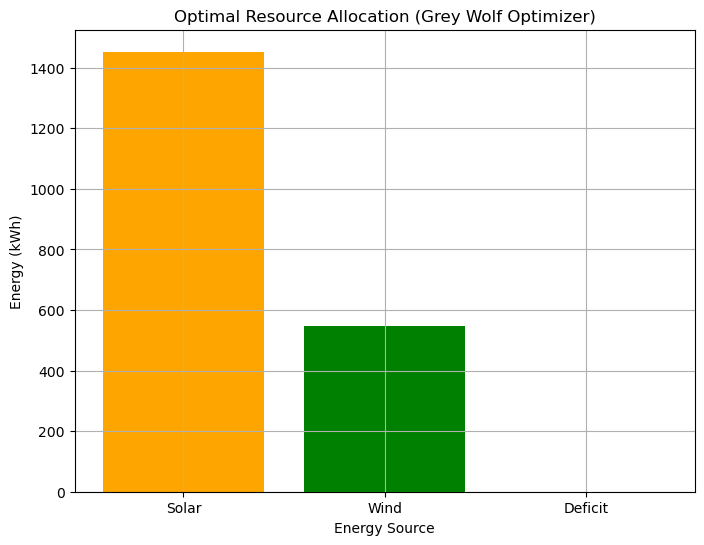

Optimal Resource Allocation (Grey Wolf Optimizer):
Solar Power Generated: 1452.86 kWh
Wind Power Generated: 547.14 kWh
Total Power Generated: 2000.00 kWh
Energy Requirement: 2000 kWh
Deficit: 0.00 kWh
Allocation Source: Combined (Solar & Wind)
Solar Percentage: 72.64%
Wind Percentage: 27.36%


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to calculate solar and wind power based on user inputs
def calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar, ensemble_wind):
    # Extract user inputs
    # Calculate solar and wind power using trained ML models
    solar_inputs = np.array([[user_inputs_solar['WindSpeed'], user_inputs_solar['Sunshine'], user_inputs_solar['AirPressure'],
                               user_inputs_solar['Radiation'], user_inputs_solar['AirTemperature'], user_inputs_solar['RelativeAirHumidity'],
                               user_inputs_solar['MONTH'], user_inputs_solar['DAY'], user_inputs_solar['hour']]])
    wind_inputs = np.array([[user_inputs_wind['Wind Speed (m/s)'], user_inputs_wind['Theoretical_Power_Curve (KWh)'],
                              user_inputs_wind['Wind Direction (°)'],user_inputs_wind['MONTH'],
                              user_inputs_wind['DAY'], user_inputs_wind['hour']]])

    # Calculate solar and wind power using trained ML models
    solar_power = ensemble_solar_2.predict(solar_inputs)
    wind_power = ensemble_wind_2.predict(wind_inputs)

    return solar_power, wind_power

# Function to determine optimal resource allocation using Grey Wolf Optimizer
def allocate_resources(user_energy_requirement, solar_allocated):
    wind_allocated = user_energy_requirement - solar_allocated
    return 'Combined (Solar & Wind)', 0, (solar_allocated / user_energy_requirement) * 100, (wind_allocated / user_energy_requirement) * 100

# Objective function for Grey Wolf Optimizer
def objective_function(x, user_energy_requirement, solar_power, wind_power):
    solar_allocated = x
    wind_allocated = user_energy_requirement - solar_allocated
    deficit = user_energy_requirement - (solar_allocated + wind_allocated)
    return deficit ** 2

def grey_wolf_optimizer(objective_function, lb, ub, max_iterations, user_energy_requirement, solar_power, wind_power):
    positions = [random.uniform(lb[i], ub[i]) for i in range(len(lb))]
    alpha_pos = positions[0]

    for _ in range(max_iterations):
        for i in range(len(positions)):
            A1 = 2 * (random.random())
            C1 = 2 * (random.random())

            D_alpha = abs(C1 * alpha_pos - positions[i])
            X1 = alpha_pos - A1 * D_alpha

            positions[i] = X1

    return positions[np.argmin([objective_function(position, user_energy_requirement, solar_power, wind_power) for position in positions])]

# Sample user inputs
user_inputs_solar = {
    'WindSpeed': 2.6,
    'Sunshine': 55,
    'AirPressure': 1010,
    'Radiation': 508,
    'AirTemperature': 16,
    'RelativeAirHumidity': 50,
    'MONTH': 4,
    'DAY': 2,
    'hour': 15
}
user_inputs_wind = {
    'Wind Speed (m/s)': 2.6,
    'Theoretical_Power_Curve (KWh)': 230,
    'Wind Direction (°)': 240,
    'MONTH': 4,
    'DAY': 2,
    'hour': 15
}


# Sample energy requirement
user_energy_requirement = 2000  # Sample user input for energy requirement

solar_power, wind_power = calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar_2, ensemble_wind_2)

# Define bounds for solar allocation
lb = [0]
ub = [user_energy_requirement]

# Run Grey Wolf Optimizer
best_position = grey_wolf_optimizer(objective_function, lb, ub, max_iterations=100, user_energy_requirement=user_energy_requirement, solar_power=solar_power, wind_power=wind_power)

# Extract solar_allocated and wind_allocated from best_position
solar_allocated = best_position
allocation_source, deficit, solar_percentage, wind_percentage = allocate_resources(user_energy_requirement, solar_allocated)

# Visualize resource allocation
plt.figure(figsize=(8, 6))
labels = ['Solar', 'Wind', 'Deficit']
values = [solar_allocated, user_energy_requirement - solar_allocated, deficit]
colors = ['orange', 'green', 'red']

plt.bar(labels, values, color=colors)
plt.xlabel('Energy Source')
plt.ylabel('Energy (kWh)')
plt.title('Optimal Resource Allocation (Grey Wolf Optimizer)')
plt.grid(True)

plt.show()

# Print the optimal resource allocation
print("Optimal Resource Allocation (Grey Wolf Optimizer):")
print(f"Solar Power Generated: {solar_allocated:.2f} kWh")
print(f"Wind Power Generated: {user_energy_requirement - solar_allocated:.2f} kWh")
print(f"Total Power Generated: {user_energy_requirement:.2f} kWh")
print(f"Energy Requirement: {user_energy_requirement} kWh")
print(f"Deficit: {deficit:.2f} kWh")
print(f"Allocation Source: {allocation_source}")
print(f"Solar Percentage: {solar_percentage:.2f}%")
print(f"Wind Percentage: {wind_percentage:.2f}%")


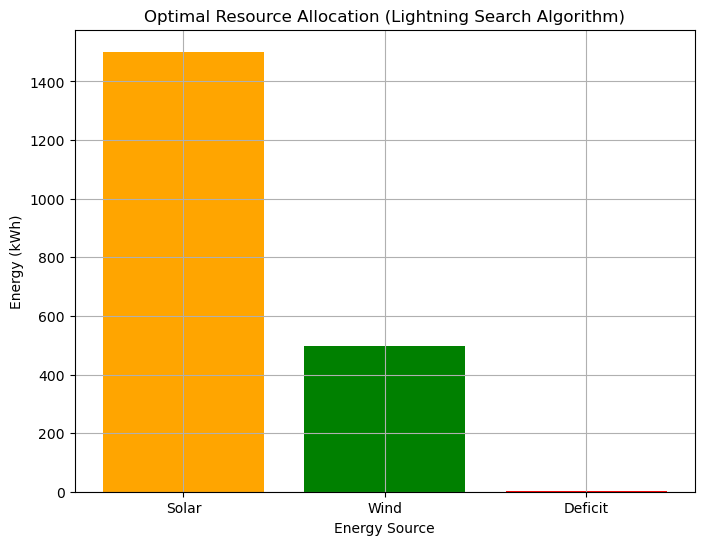

Optimal Resource Allocation (Lightning Search Algorithm):
Solar Power Generated: 1501.55 kWh
Wind Power Generated: 497.11 kWh
Total Power Generated: 1998.66 kWh
Energy Requirement: 2000 kWh
Deficit: 1.34 kWh
Allocation Source: Combined (Solar & Wind)
Solar Percentage: 75.08%
Wind Percentage: 24.86%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate solar and wind power based on user inputs
def calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar, ensemble_wind):
    # Extract user inputs
    # Calculate solar and wind power using trained ML models
    solar_inputs = np.array([[user_inputs_solar['WindSpeed'], user_inputs_solar['Sunshine'], user_inputs_solar['AirPressure'],
                               user_inputs_solar['Radiation'], user_inputs_solar['AirTemperature'], user_inputs_solar['RelativeAirHumidity'],
                               user_inputs_solar['MONTH'], user_inputs_solar['DAY'], user_inputs_solar['hour']]])
    wind_inputs = np.array([[user_inputs_wind['Wind Speed (m/s)'], user_inputs_wind['Theoretical_Power_Curve (KWh)'],
                              user_inputs_wind['Wind Direction (°)'],user_inputs_wind['MONTH'],
                              user_inputs_wind['DAY'], user_inputs_wind['hour']]])

    # Calculate solar and wind power using trained ML models
    solar_power = ensemble_solar_2.predict(solar_inputs)
    wind_power = ensemble_wind_2.predict(wind_inputs)

    return solar_power, wind_power

# Function to determine optimal resource allocation using Lightning Search Algorithm
def allocate_resources(user_energy_requirement, best_position):
    solar_allocated, wind_allocated = best_position
    deficit = user_energy_requirement - (solar_allocated + wind_allocated)
    return 'Combined (Solar & Wind)', deficit, (solar_allocated / user_energy_requirement) * 100, (wind_allocated / user_energy_requirement) * 100

# Objective function for Lightning Search Algorithm
def objective_function(x, user_energy_requirement, solar_power, wind_power):
    solar_allocated, wind_allocated = x
    deficit = user_energy_requirement - (solar_allocated + wind_allocated)
    return deficit ** 2

# Lightning Search Algorithm
def lightning_search_algorithm(objective_function, lb, ub, max_iterations, user_energy_requirement, solar_power, wind_power):
    # Initialize population
    population = np.random.uniform(lb, ub, size=(max_iterations, len(lb)))

    # Iteration loop
    for i in range(max_iterations):
        # Mutation
        mutation_rate = 0.1  # Adjust as needed
        for j in range(len(population[i])):
            if np.random.rand() < mutation_rate:
                population[i, j] = np.random.uniform(lb[j], ub[j])

        # Crossover
        crossover_rate = 0.2  # Adjust as needed
        if np.random.rand() < crossover_rate:
            parent1 = population[np.random.randint(0, max_iterations)]
            parent2 = population[np.random.randint(0, max_iterations)]
            crossover_point = np.random.randint(low=1, high=len(lb))
            child = np.copy(parent1)
            child[crossover_point:] = parent2[crossover_point:]
            population[i] = child

        # Selection
        best_individual_index = np.argmin([objective_function(p, user_energy_requirement, solar_power, wind_power) for p in population])
        best_individual = population[best_individual_index]

    return best_individual

user_inputs_solar = {
    'WindSpeed': 2.6,
    'Sunshine': 55,
    'AirPressure': 1010,
    'Radiation': 508,
    'AirTemperature': 16,
    'RelativeAirHumidity': 50,
    'MONTH': 4,
    'DAY': 2,
    'hour': 15
}
user_inputs_wind = {
    'Wind Speed (m/s)': 2.6,
    'Theoretical_Power_Curve (KWh)': 230,
    'Wind Direction (°)': 240,
    'MONTH': 4,
    'DAY': 2,
    'hour': 15
}

# Sample energy requirement
user_energy_requirement = 2000  # Sample user input for energy requirement

# Sample solar and wind power
solar_power, wind_power = calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar_2, ensemble_wind_2)

# Define bounds for solar and wind allocation
lb = [0, 0]
ub = [user_energy_requirement, user_energy_requirement]

# Run Lightning Search Algorithm
best_position = lightning_search_algorithm(objective_function, lb, ub, max_iterations=100, user_energy_requirement=user_energy_requirement, solar_power=solar_power, wind_power=wind_power)

# Extract solar_allocated and wind_allocated from best_position
solar_allocated, wind_allocated = best_position
allocation_source, deficit, solar_percentage, wind_percentage = allocate_resources(user_energy_requirement, best_position)

# Visualize resource allocation
plt.figure(figsize=(8, 6))
labels = ['Solar', 'Wind', 'Deficit']
values = [solar_allocated, wind_allocated, deficit]
colors = ['orange', 'green', 'red']

plt.bar(labels, values, color=colors)
plt.xlabel('Energy Source')
plt.ylabel('Energy (kWh)')
plt.title('Optimal Resource Allocation (Lightning Search Algorithm)')
plt.grid(True)

plt.show()

# Print the optimal resource allocation
print("Optimal Resource Allocation (Lightning Search Algorithm):")
print(f"Solar Power Generated: {solar_allocated:.2f} kWh")
print(f"Wind Power Generated: {wind_allocated:.2f} kWh")
print(f"Total Power Generated: {solar_allocated+wind_allocated:.2f} kWh")
print(f"Energy Requirement: {user_energy_requirement} kWh")
print(f"Deficit: {deficit:.2f} kWh")
print(f"Allocation Source: {allocation_source}")
print(f"Solar Percentage: {solar_percentage:.2f}%")
print(f"Wind Percentage: {wind_percentage:.2f}%")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import VotingRegressor

# Function to calculate solar and wind power based on user inputs
def calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar, ensemble_wind):
    # Extract user inputs
    # Calculate solar and wind power using trained ML models
    solar_inputs = np.array([[user_inputs_solar['WindSpeed'], user_inputs_solar['Sunshine'], user_inputs_solar['AirPressure'],
                               user_inputs_solar['Radiation'], user_inputs_solar['AirTemperature'], user_inputs_solar['RelativeAirHumidity'],
                               user_inputs_solar['MONTH'], user_inputs_solar['DAY'], user_inputs_solar['hour']]])
    wind_inputs = np.array([[user_inputs_wind['Wind Speed (m/s)'], user_inputs_wind['Theoretical_Power_Curve (KWh)'],
                              user_inputs_wind['Wind Direction (°)'],user_inputs_wind['MONTH'],
                              user_inputs_wind['DAY'], user_inputs_wind['hour']]])

    # Calculate solar and wind power using trained ML models
    solar_power = ensemble_solar_1.predict(solar_inputs)
    wind_power = ensemble_wind_1.predict(wind_inputs)

    return solar_power, wind_power

# Function to determine optimal resource allocation
def allocate_resources(user_energy_requirement, solar_power, wind_power):
    if solar_power >= user_energy_requirement and solar_power <= wind_power:
        return 'Solar', solar_power
    elif wind_power >= user_energy_requirement and wind_power < solar_power:
        return 'Wind', wind_power
    else:
        # In case neither solar nor wind can meet the energy requirement, calculate deficit
        total_power = solar_power + wind_power
        solar_percentage = (solar_power / total_power) * 100
        wind_percentage = (wind_power / total_power) * 100
        deficit = user_energy_requirement - total_power
        return 'Combination (Solar & Wind)', deficit, solar_percentage, wind_percentage

# Sample user inputs (replace with actual user input mechanism)
user_inputs_solar = {
    'WindSpeed': 2.6,
    'Sunshine': 1,
    'AirPressure': 1010,
    'Radiation': 240,
    'AirTemperature': 16,
    'RelativeAirHumidity': 46,
    'MONTH': 7,
    'DAY': 3,
    'hour': 11
}
user_inputs_wind = {
    'Wind Speed (m/s)': 2.6,
    'Theoretical_Power_Curve (KWh)': 160,
    'Wind Direction (°)': 260,
    'MONTH': 7,
    'DAY': 3,
    'hour': 11
}
# Sample energy requirement (replace with actual user input mechanism)
user_energy_requirement = 2000  # Sample user input for energy requirement

# Calculate solar and wind power using trained ML models
solar_power, wind_power = calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar_1, ensemble_wind_1)

# Allocate resources to meet user's energy requirement
allocation_source, allocated_power, solar_percentage, wind_percentage = allocate_resources(user_energy_requirement, solar_power, wind_power)

# Calculate the remaining power to be generated
remaining_power = user_energy_requirement - abs(allocated_power)

# Print the optimal resource allocation
print(f"Resource Allocation:")
print(f"Energy Requirement: {user_energy_requirement}")
print(f"Solar Power Generated: {solar_power}")
print(f"Wind Power Generated: {wind_power}")
print(f"Allocation Source: {allocation_source}")
print(f"Solar Percentage: {solar_percentage}%")
print(f"Wind Percentage: {wind_percentage}%")
print(f"Deficit: {allocated_power}")

Resource Allocation:
Energy Requirement: 2000
Solar Power Generated: [1964.37503454]
Wind Power Generated: [31.03730171]
Allocation Source: Combination (Solar & Wind)
Solar Percentage: [98.44456701]%
Wind Percentage: [1.55543299]%
Deficit: [4.58766375]


Stopping search: maximum iterations reached --> 100


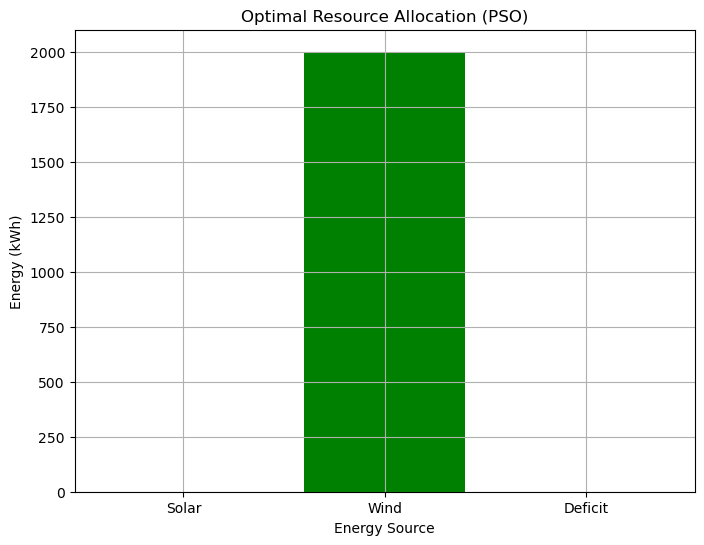

Optimal Resource Allocation (PSO):
Solar Power Generated: 0.00 kWh
Wind Power Generated: 2000.00 kWh
Total Power Generated: 2000.00 kWh
Energy Requirement: 2000 kWh
Deficit: 0.00 kWh
Allocation Source: Combined (Solar & Wind)
Solar Percentage: 0.00%
Wind Percentage: 100.00%


In [ ]:
import numpy as np
import pyswarm as ps

# Function to calculate solar and wind power based on user inputs
def calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar, ensemble_wind):
    # Extract user inputs
    # Calculate solar and wind power using trained ML models
    solar_inputs = np.array([[user_inputs_solar['WindSpeed'], user_inputs_solar['Sunshine'], user_inputs_solar['AirPressure'],
                               user_inputs_solar['Radiation'], user_inputs_solar['AirTemperature'], user_inputs_solar['RelativeAirHumidity'],
                               user_inputs_solar['MONTH'], user_inputs_solar['DAY'], user_inputs_solar['hour']]])
    wind_inputs = np.array([[user_inputs_wind['Wind Speed (m/s)'], user_inputs_wind['Theoretical_Power_Curve (KWh)'],
                              user_inputs_wind['Wind Direction (°)'],user_inputs_wind['MONTH'],
                              user_inputs_wind['DAY'], user_inputs_wind['hour']]])

    # Calculate solar and wind power using trained ML models
    solar_power = ensemble_solar_3.predict(solar_inputs)
    wind_power = ensemble_wind_3.predict(wind_inputs)

    return solar_power, wind_power

# Function to determine optimal resource allocation using PSO
def allocate_resources(user_energy_requirement, solar_power, wind_power):
    total_power = solar_power + wind_power
    solar_percentage = (solar_power / total_power) * 100
    wind_percentage = (wind_power / total_power) * 100
    deficit = user_energy_requirement - total_power

    if deficit <= 0:
        return 'Combined (Solar & Wind)', 0, solar_percentage, wind_percentage
    else:
        return 'Combined (Solar & Wind)', deficit, solar_percentage, wind_percentage

# Sample user inputs (replace with actual user input mechanism)
user_inputs_solar = {
    'WindSpeed': 2.6,
    'Sunshine': 1,
    'AirPressure': 1010,
    'Radiation': 240,
    'AirTemperature': 16,
    'RelativeAirHumidity': 46,
    'MONTH': 7,
    'DAY': 3,
    'hour': 11
}
user_inputs_wind = {
    'Wind Speed (m/s)': 2.6,
    'Theoretical_Power_Curve (KWh)': 160,
    'Wind Direction (°)': 260,
    'MONTH': 7,
    'DAY': 3,
    'hour': 11
}

# Sample energy requirement (replace with actual user input mechanism)
user_energy_requirement = 2000  # Sample user input for energy requirement

# Calculate solar and wind power using trained ML models
solar_power, wind_power = calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar_3, ensemble_wind_3)

# Optimize resource allocation using PSO
def objective_function(x, user_energy_requirement, solar_power, wind_power):
    solar_allocated = x[0]
    wind_allocated = x[1]
    deficit = user_energy_requirement - (solar_allocated + wind_allocated)
    return deficit ** 2

lb = [0, 0]  # Lower bounds for solar and wind allocation
ub = [user_energy_requirement, user_energy_requirement]  # Upper bounds for solar and wind allocation
x_optimal, _ = ps.pso(objective_function, lb, ub, args=(user_energy_requirement, solar_power, wind_power))

solar_allocated, wind_allocated = x_optimal

# Allocate resources based on optimized allocation
allocation_source, deficit, solar_percentage, wind_percentage = allocate_resources(user_energy_requirement, solar_allocated, wind_allocated)

# Assuming solar_allocated, wind_allocated, and user_energy_requirement are variables containing allocation results

# Visualizing resource allocation
plt.figure(figsize=(8, 6))
labels = ['Solar', 'Wind', 'Deficit']
values = [solar_allocated, wind_allocated, max(0, user_energy_requirement - (solar_allocated + wind_allocated))]
colors = ['orange', 'green', 'red']

plt.bar(labels, values, color=colors)
plt.xlabel('Energy Source')
plt.ylabel('Energy (kWh)')
plt.title('Optimal Resource Allocation (PSO)')
plt.grid(True)

plt.show()

# Print the optimal resource allocation
print("Optimal Resource Allocation (PSO):")
print(f"Solar Power Generated: {solar_allocated:.2f} kWh")
print(f"Wind Power Generated: {wind_allocated:.2f} kWh")
print(f"Total Power Generated: {(solar_allocated + wind_allocated):.2f} kWh")
print(f"Energy Requirement: {user_energy_requirement} kWh")
print(f"Deficit: {deficit:.2f} kWh")
print(f"Allocation Source: {allocation_source}")
print(f"Solar Percentage: {solar_percentage:.2f}%")
print(f"Wind Percentage: {wind_percentage:.2f}%")

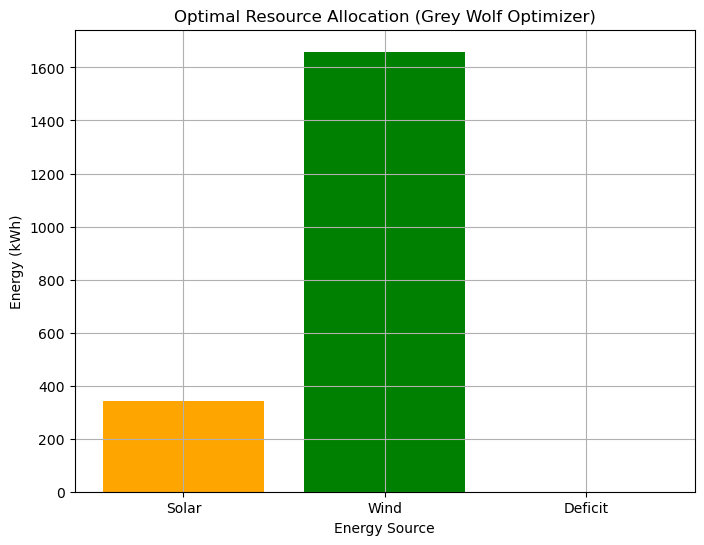

Optimal Resource Allocation (Grey Wolf Optimizer):
Solar Power Generated: 340.69 kWh
Wind Power Generated: 1659.31 kWh
Total Power Generated: 2000.00 kWh
Energy Requirement: 2000 kWh
Deficit: 0.00 kWh
Allocation Source: Combined (Solar & Wind)
Solar Percentage: 17.03%
Wind Percentage: 82.97%


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to calculate solar and wind power based on user inputs
def calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar, ensemble_wind):
    # Extract user inputs
    # Calculate solar and wind power using trained ML models
    solar_inputs = np.array([[user_inputs_solar['WindSpeed'], user_inputs_solar['Sunshine'], user_inputs_solar['AirPressure'],
                               user_inputs_solar['Radiation'], user_inputs_solar['AirTemperature'], user_inputs_solar['RelativeAirHumidity'],
                               user_inputs_solar['MONTH'], user_inputs_solar['DAY'], user_inputs_solar['hour']]])
    wind_inputs = np.array([[user_inputs_wind['Wind Speed (m/s)'], user_inputs_wind['Theoretical_Power_Curve (KWh)'],
                              user_inputs_wind['Wind Direction (°)'],user_inputs_wind['MONTH'],
                              user_inputs_wind['DAY'], user_inputs_wind['hour']]])

    # Calculate solar and wind power using trained ML models
    solar_power = ensemble_solar_3.predict(solar_inputs)
    wind_power = ensemble_wind_3.predict(wind_inputs)

    return solar_power, wind_power

# Function to determine optimal resource allocation using Grey Wolf Optimizer
def allocate_resources(user_energy_requirement, solar_allocated):
    wind_allocated = user_energy_requirement - solar_allocated
    return 'Combined (Solar & Wind)', 0, (solar_allocated / user_energy_requirement) * 100, (wind_allocated / user_energy_requirement) * 100

# Objective function for Grey Wolf Optimizer
def objective_function(x, user_energy_requirement, solar_power, wind_power):
    solar_allocated = x
    wind_allocated = user_energy_requirement - solar_allocated
    deficit = user_energy_requirement - (solar_allocated + wind_allocated)
    return deficit ** 2

def grey_wolf_optimizer(objective_function, lb, ub, max_iterations, user_energy_requirement, solar_power, wind_power):
    positions = [random.uniform(lb[i], ub[i]) for i in range(len(lb))]
    alpha_pos = positions[0]

    for _ in range(max_iterations):
        for i in range(len(positions)):
            A1 = 2 * (random.random())
            C1 = 2 * (random.random())

            D_alpha = abs(C1 * alpha_pos - positions[i])
            X1 = alpha_pos - A1 * D_alpha

            positions[i] = X1

    return positions[np.argmin([objective_function(position, user_energy_requirement, solar_power, wind_power) for position in positions])]

# Sample user inputs
user_inputs_solar = {
    'WindSpeed': 2.6,
    'Sunshine': 1,
    'AirPressure': 1010,
    'Radiation': 240,
    'AirTemperature': 16,
    'RelativeAirHumidity': 46,
    'MONTH': 7,
    'DAY': 3,
    'hour': 11
}
user_inputs_wind = {
    'Wind Speed (m/s)': 2.6,
    'Theoretical_Power_Curve (KWh)': 160,
    'Wind Direction (°)': 260,
    'MONTH': 7,
    'DAY': 3,
    'hour': 11
}


# Sample energy requirement
user_energy_requirement = 2000  # Sample user input for energy requirement

solar_power, wind_power = calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar_3, ensemble_wind_3)

# Define bounds for solar allocation
lb = [0]
ub = [user_energy_requirement]

# Run Grey Wolf Optimizer
best_position = grey_wolf_optimizer(objective_function, lb, ub, max_iterations=100, user_energy_requirement=user_energy_requirement, solar_power=solar_power, wind_power=wind_power)

# Extract solar_allocated and wind_allocated from best_position
solar_allocated = best_position
allocation_source, deficit, solar_percentage, wind_percentage = allocate_resources(user_energy_requirement, solar_allocated)

# Visualize resource allocation
plt.figure(figsize=(8, 6))
labels = ['Solar', 'Wind', 'Deficit']
values = [solar_allocated, user_energy_requirement - solar_allocated, deficit]
colors = ['orange', 'green', 'red']

plt.bar(labels, values, color=colors)
plt.xlabel('Energy Source')
plt.ylabel('Energy (kWh)')
plt.title('Optimal Resource Allocation (Grey Wolf Optimizer)')
plt.grid(True)

plt.show()

# Print the optimal resource allocation
print("Optimal Resource Allocation (Grey Wolf Optimizer):")
print(f"Solar Power Generated: {solar_allocated:.2f} kWh")
print(f"Wind Power Generated: {user_energy_requirement - solar_allocated:.2f} kWh")
print(f"Total Power Generated: {user_energy_requirement:.2f} kWh")
print(f"Energy Requirement: {user_energy_requirement} kWh")
print(f"Deficit: {deficit:.2f} kWh")
print(f"Allocation Source: {allocation_source}")
print(f"Solar Percentage: {solar_percentage:.2f}%")
print(f"Wind Percentage: {wind_percentage:.2f}%")


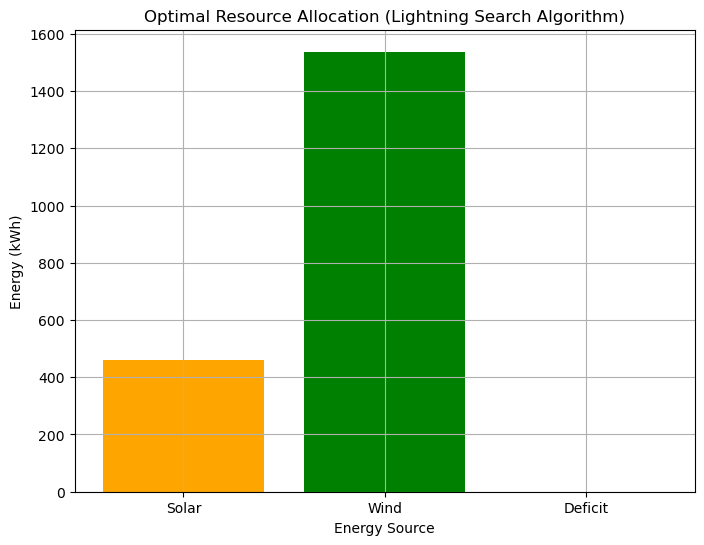

Optimal Resource Allocation (Lightning Search Algorithm):
Solar Power Generated: 461.75 kWh
Wind Power Generated: 1537.63 kWh
Total Power Generated: 1999.38 kWh
Energy Requirement: 2000 kWh
Deficit: 0.62 kWh
Allocation Source: Combined (Solar & Wind)
Solar Percentage: 23.09%
Wind Percentage: 76.88%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate solar and wind power based on user inputs
def calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar, ensemble_wind):
    # Extract user inputs
    # Calculate solar and wind power using trained ML models
    solar_inputs = np.array([[user_inputs_solar['WindSpeed'], user_inputs_solar['Sunshine'], user_inputs_solar['AirPressure'],
                               user_inputs_solar['Radiation'], user_inputs_solar['AirTemperature'], user_inputs_solar['RelativeAirHumidity'],
                               user_inputs_solar['MONTH'], user_inputs_solar['DAY'], user_inputs_solar['hour']]])
    wind_inputs = np.array([[user_inputs_wind['Wind Speed (m/s)'], user_inputs_wind['Theoretical_Power_Curve (KWh)'],
                              user_inputs_wind['Wind Direction (°)'],user_inputs_wind['MONTH'],
                              user_inputs_wind['DAY'], user_inputs_wind['hour']]])

    # Calculate solar and wind power using trained ML models
    solar_power = ensemble_solar_3.predict(solar_inputs)
    wind_power = ensemble_wind_3.predict(wind_inputs)

    return solar_power, wind_power

# Function to determine optimal resource allocation using Lightning Search Algorithm
def allocate_resources(user_energy_requirement, best_position):
    solar_allocated, wind_allocated = best_position
    deficit = user_energy_requirement - (solar_allocated + wind_allocated)
    return 'Combined (Solar & Wind)', deficit, (solar_allocated / user_energy_requirement) * 100, (wind_allocated / user_energy_requirement) * 100

# Objective function for Lightning Search Algorithm
def objective_function(x, user_energy_requirement, solar_power, wind_power):
    solar_allocated, wind_allocated = x
    deficit = user_energy_requirement - (solar_allocated + wind_allocated)
    return deficit ** 2

# Lightning Search Algorithm
def lightning_search_algorithm(objective_function, lb, ub, max_iterations, user_energy_requirement, solar_power, wind_power):
    # Initialize population
    population = np.random.uniform(lb, ub, size=(max_iterations, len(lb)))

    # Iteration loop
    for i in range(max_iterations):
        # Mutation
        mutation_rate = 0.1  # Adjust as needed
        for j in range(len(population[i])):
            if np.random.rand() < mutation_rate:
                population[i, j] = np.random.uniform(lb[j], ub[j])

        # Crossover
        crossover_rate = 0.2  # Adjust as needed
        if np.random.rand() < crossover_rate:
            parent1 = population[np.random.randint(0, max_iterations)]
            parent2 = population[np.random.randint(0, max_iterations)]
            crossover_point = np.random.randint(low=1, high=len(lb))
            child = np.copy(parent1)
            child[crossover_point:] = parent2[crossover_point:]
            population[i] = child

        # Selection
        best_individual_index = np.argmin([objective_function(p, user_energy_requirement, solar_power, wind_power) for p in population])
        best_individual = population[best_individual_index]

    return best_individual

user_inputs_solar = {
    'WindSpeed': 2.6,
    'Sunshine': 1,
    'AirPressure': 1010,
    'Radiation': 240,
    'AirTemperature': 16,
    'RelativeAirHumidity': 46,
    'MONTH': 7,
    'DAY': 3,
    'hour': 11
}
user_inputs_wind = {
    'Wind Speed (m/s)': 2.6,
    'Theoretical_Power_Curve (KWh)': 160,
    'Wind Direction (°)': 260,
    'MONTH': 7,
    'DAY': 3,
    'hour': 11
}

# Sample energy requirement
user_energy_requirement = 2000  # Sample user input for energy requirement

# Sample solar and wind power
solar_power, wind_power = calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar_3, ensemble_wind_3)

# Define bounds for solar and wind allocation
lb = [0, 0]
ub = [user_energy_requirement, user_energy_requirement]

# Run Lightning Search Algorithm
best_position = lightning_search_algorithm(objective_function, lb, ub, max_iterations=100, user_energy_requirement=user_energy_requirement, solar_power=solar_power, wind_power=wind_power)

# Extract solar_allocated and wind_allocated from best_position
solar_allocated, wind_allocated = best_position
allocation_source, deficit, solar_percentage, wind_percentage = allocate_resources(user_energy_requirement, best_position)

# Visualize resource allocation
plt.figure(figsize=(8, 6))
labels = ['Solar', 'Wind', 'Deficit']
values = [solar_allocated, wind_allocated, deficit]
colors = ['orange', 'green', 'red']

plt.bar(labels, values, color=colors)
plt.xlabel('Energy Source')
plt.ylabel('Energy (kWh)')
plt.title('Optimal Resource Allocation (Lightning Search Algorithm)')
plt.grid(True)

plt.show()

# Print the optimal resource allocation
print("Optimal Resource Allocation (Lightning Search Algorithm):")
print(f"Solar Power Generated: {solar_allocated:.2f} kWh")
print(f"Wind Power Generated: {wind_allocated:.2f} kWh")
print(f"Total Power Generated: {solar_allocated+wind_allocated:.2f} kWh")
print(f"Energy Requirement: {user_energy_requirement} kWh")
print(f"Deficit: {deficit:.2f} kWh")
print(f"Allocation Source: {allocation_source}")
print(f"Solar Percentage: {solar_percentage:.2f}%")
print(f"Wind Percentage: {wind_percentage:.2f}%")

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import VotingRegressor

# Function to calculate solar and wind power based on user inputs
def calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar, ensemble_wind):
    # Extract user inputs
    # Calculate solar and wind power using trained ML models
    solar_inputs = np.array([[user_inputs_solar['WindSpeed'], user_inputs_solar['Sunshine'], user_inputs_solar['AirPressure'],
                               user_inputs_solar['Radiation'], user_inputs_solar['AirTemperature'], user_inputs_solar['RelativeAirHumidity'],
                               user_inputs_solar['MONTH'], user_inputs_solar['DAY'], user_inputs_solar['hour']]])
    wind_inputs = np.array([[user_inputs_wind['Wind Speed (m/s)'], user_inputs_wind['Theoretical_Power_Curve (KWh)'],
                              user_inputs_wind['Wind Direction (°)'],user_inputs_wind['MONTH'],
                              user_inputs_wind['DAY'], user_inputs_wind['hour']]])

    # Calculate solar and wind power using trained ML models
    solar_power = ensemble_solar_4.predict(solar_inputs)
    wind_power = ensemble_wind_4.predict(wind_inputs)

    return solar_power, wind_power

# Function to determine optimal resource allocation
def allocate_resources(user_energy_requirement, solar_power, wind_power):
    if solar_power >= user_energy_requirement and solar_power <= wind_power:
        return 'Solar', solar_power
    elif wind_power >= user_energy_requirement and wind_power < solar_power:
        return 'Wind', wind_power
    else:
        # In case neither solar nor wind can meet the energy requirement, calculate deficit
        total_power = solar_power + wind_power
        solar_percentage = (solar_power / total_power) * 100
        wind_percentage = (wind_power / total_power) * 100
        deficit = user_energy_requirement - total_power
        return 'Combination (Solar & Wind)', deficit, solar_percentage, wind_percentage

# Sample user inputs (replace with actual user input mechanism)
user_inputs_solar = {
    'WindSpeed': 1.5,
    'Sunshine': 1,
    'AirPressure': 1000,
    'Radiation': 90,
    'AirTemperature': 5,
    'RelativeAirHumidity': 94,
    'MONTH': 10,
    'DAY': 11,
    'hour': 12
}
user_inputs_wind = {
    'Wind Speed (m/s)': 1.5,
    'Theoretical_Power_Curve (KWh)': 2000,
    'Wind Direction (°)': 28,
    'MONTH': 10,
    'DAY': 11,
    'hour': 12
}
# Sample energy requirement (replace with actual user input mechanism)
user_energy_requirement = 2000  # Sample user input for energy requirement

# Calculate solar and wind power using trained ML models
solar_power, wind_power = calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar_4, ensemble_wind_4)

# Allocate resources to meet user's energy requirement
allocation_source, allocated_power, solar_percentage, wind_percentage = allocate_resources(user_energy_requirement, solar_power, wind_power)

# Calculate the remaining power to be generated
remaining_power = user_energy_requirement - abs(allocated_power)

# Print the optimal resource allocation
print(f"Resource Allocation:")
print(f"Energy Requirement: {user_energy_requirement}")
print(f"Solar Power Generated: {solar_power}")
print(f"Wind Power Generated: {wind_power}")
print(f"Allocation Source: {allocation_source}")
print(f"Solar Percentage: {solar_percentage}%")
print(f"Wind Percentage: {wind_percentage}%")
print(f"Deficit: {allocated_power}")

Resource Allocation:
Energy Requirement: 2000
Solar Power Generated: [635.39237623]
Wind Power Generated: [656.64868372]
Allocation Source: Combination (Solar & Wind)
Solar Percentage: [49.17741362]%
Wind Percentage: [50.82258638]%
Deficit: [707.95894006]


Stopping search: maximum iterations reached --> 100


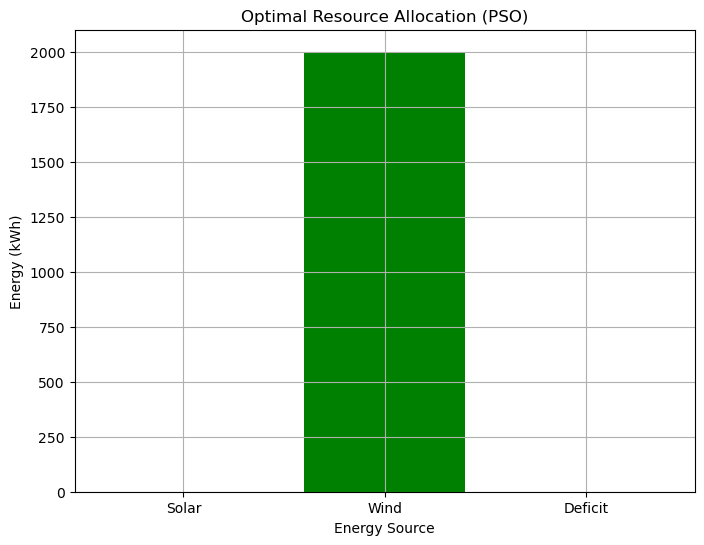

Optimal Resource Allocation (PSO):
Solar Power Generated: 0.00 kWh
Wind Power Generated: 2000.00 kWh
Total Power Generated: 2000.00 kWh
Energy Requirement: 2000 kWh
Deficit: 0.00 kWh
Allocation Source: Combined (Solar & Wind)
Solar Percentage: 0.00%
Wind Percentage: 100.00%


In [ ]:
import numpy as np
import pyswarm as ps

# Function to calculate solar and wind power based on user inputs
def calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar, ensemble_wind):
    # Extract user inputs
    # Calculate solar and wind power using trained ML models
    solar_inputs = np.array([[user_inputs_solar['WindSpeed'], user_inputs_solar['Sunshine'], user_inputs_solar['AirPressure'],
                               user_inputs_solar['Radiation'], user_inputs_solar['AirTemperature'], user_inputs_solar['RelativeAirHumidity'],
                               user_inputs_solar['MONTH'], user_inputs_solar['DAY'], user_inputs_solar['hour']]])
    wind_inputs = np.array([[user_inputs_wind['Wind Speed (m/s)'], user_inputs_wind['Theoretical_Power_Curve (KWh)'],
                              user_inputs_wind['Wind Direction (°)'],user_inputs_wind['MONTH'],
                              user_inputs_wind['DAY'], user_inputs_wind['hour']]])

    # Calculate solar and wind power using trained ML models
    solar_power = ensemble_solar_4.predict(solar_inputs)
    wind_power = ensemble_wind_4.predict(wind_inputs)

    return solar_power, wind_power

# Function to determine optimal resource allocation using PSO
def allocate_resources(user_energy_requirement, solar_power, wind_power):
    total_power = solar_power + wind_power
    solar_percentage = (solar_power / total_power) * 100
    wind_percentage = (wind_power / total_power) * 100
    deficit = user_energy_requirement - total_power

    if deficit <= 0:
        return 'Combined (Solar & Wind)', 0, solar_percentage, wind_percentage
    else:
        return 'Combined (Solar & Wind)', deficit, solar_percentage, wind_percentage

# Sample user inputs (replace with actual user input mechanism)
user_inputs_solar = {
    'WindSpeed': 1.5,
    'Sunshine': 1,
    'AirPressure': 1000,
    'Radiation': 90,
    'AirTemperature': 5,
    'RelativeAirHumidity': 94,
    'MONTH': 10,
    'DAY': 11,
    'hour': 12
}
user_inputs_wind = {
    'Wind Speed (m/s)': 1.5,
    'Theoretical_Power_Curve (KWh)': 2000,
    'Wind Direction (°)': 28,
    'MONTH': 10,
    'DAY': 11,
    'hour': 12
}

# Sample energy requirement (replace with actual user input mechanism)
user_energy_requirement = 2000  # Sample user input for energy requirement

# Calculate solar and wind power using trained ML models
solar_power, wind_power = calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar_4, ensemble_wind_4)

# Optimize resource allocation using PSO
def objective_function(x, user_energy_requirement, solar_power, wind_power):
    solar_allocated = x[0]
    wind_allocated = x[1]
    deficit = user_energy_requirement - (solar_allocated + wind_allocated)
    return deficit ** 2

lb = [0, 0]  # Lower bounds for solar and wind allocation
ub = [user_energy_requirement, user_energy_requirement]  # Upper bounds for solar and wind allocation
x_optimal, _ = ps.pso(objective_function, lb, ub, args=(user_energy_requirement, solar_power, wind_power))

solar_allocated, wind_allocated = x_optimal

# Allocate resources based on optimized allocation
allocation_source, deficit, solar_percentage, wind_percentage = allocate_resources(user_energy_requirement, solar_allocated, wind_allocated)

# Assuming solar_allocated, wind_allocated, and user_energy_requirement are variables containing allocation results

# Visualizing resource allocation
plt.figure(figsize=(8, 6))
labels = ['Solar', 'Wind', 'Deficit']
values = [solar_allocated, wind_allocated, max(0, user_energy_requirement - (solar_allocated + wind_allocated))]
colors = ['orange', 'green', 'red']

plt.bar(labels, values, color=colors)
plt.xlabel('Energy Source')
plt.ylabel('Energy (kWh)')
plt.title('Optimal Resource Allocation (PSO)')
plt.grid(True)

plt.show()

# Print the optimal resource allocation
print("Optimal Resource Allocation (PSO):")
print(f"Solar Power Generated: {solar_allocated:.2f} kWh")
print(f"Wind Power Generated: {wind_allocated:.2f} kWh")
print(f"Total Power Generated: {(solar_allocated + wind_allocated):.2f} kWh")
print(f"Energy Requirement: {user_energy_requirement} kWh")
print(f"Deficit: {deficit:.2f} kWh")
print(f"Allocation Source: {allocation_source}")
print(f"Solar Percentage: {solar_percentage:.2f}%")
print(f"Wind Percentage: {wind_percentage:.2f}%")

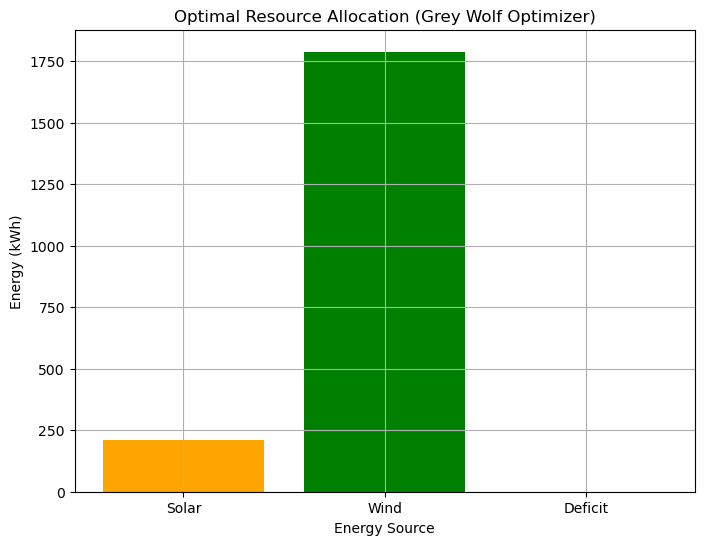

Optimal Resource Allocation (Grey Wolf Optimizer):
Solar Power Generated: 212.04 kWh
Wind Power Generated: 1787.96 kWh
Total Power Generated: 2000.00 kWh
Energy Requirement: 2000 kWh
Deficit: 0.00 kWh
Allocation Source: Combined (Solar & Wind)
Solar Percentage: 10.60%
Wind Percentage: 89.40%


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Function to calculate solar and wind power based on user inputs
def calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar, ensemble_wind):
    # Extract user inputs
    # Calculate solar and wind power using trained ML models
    solar_inputs = np.array([[user_inputs_solar['WindSpeed'], user_inputs_solar['Sunshine'], user_inputs_solar['AirPressure'],
                               user_inputs_solar['Radiation'], user_inputs_solar['AirTemperature'], user_inputs_solar['RelativeAirHumidity'],
                               user_inputs_solar['MONTH'], user_inputs_solar['DAY'], user_inputs_solar['hour']]])
    wind_inputs = np.array([[user_inputs_wind['Wind Speed (m/s)'], user_inputs_wind['Theoretical_Power_Curve (KWh)'],
                              user_inputs_wind['Wind Direction (°)'],user_inputs_wind['MONTH'],
                              user_inputs_wind['DAY'], user_inputs_wind['hour']]])

    # Calculate solar and wind power using trained ML models
    solar_power = ensemble_solar_4.predict(solar_inputs)
    wind_power = ensemble_wind_4.predict(wind_inputs)

    return solar_power, wind_power

# Function to determine optimal resource allocation using Grey Wolf Optimizer
def allocate_resources(user_energy_requirement, solar_allocated):
    wind_allocated = user_energy_requirement - solar_allocated
    return 'Combined (Solar & Wind)', 0, (solar_allocated / user_energy_requirement) * 100, (wind_allocated / user_energy_requirement) * 100

# Objective function for Grey Wolf Optimizer
def objective_function(x, user_energy_requirement, solar_power, wind_power):
    solar_allocated = x
    wind_allocated = user_energy_requirement - solar_allocated
    deficit = user_energy_requirement - (solar_allocated + wind_allocated)
    return deficit ** 2

def grey_wolf_optimizer(objective_function, lb, ub, max_iterations, user_energy_requirement, solar_power, wind_power):
    positions = [random.uniform(lb[i], ub[i]) for i in range(len(lb))]
    alpha_pos = positions[0]

    for _ in range(max_iterations):
        for i in range(len(positions)):
            A1 = 2 * (random.random())
            C1 = 2 * (random.random())

            D_alpha = abs(C1 * alpha_pos - positions[i])
            X1 = alpha_pos - A1 * D_alpha

            positions[i] = X1

    return positions[np.argmin([objective_function(position, user_energy_requirement, solar_power, wind_power) for position in positions])]

# Sample user inputs
user_inputs_solar = {
    'WindSpeed': 1.5,
    'Sunshine': 1,
    'AirPressure': 1000,
    'Radiation': 90,
    'AirTemperature': 5,
    'RelativeAirHumidity': 94,
    'MONTH': 10,
    'DAY': 11,
    'hour': 12
}
user_inputs_wind = {
    'Wind Speed (m/s)': 1.5,
    'Theoretical_Power_Curve (KWh)': 2000,
    'Wind Direction (°)': 28,
    'MONTH': 10,
    'DAY': 11,
    'hour': 12
}


# Sample energy requirement
user_energy_requirement = 2000  # Sample user input for energy requirement

solar_power, wind_power = calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar_4, ensemble_wind_4)

# Define bounds for solar allocation
lb = [0]
ub = [user_energy_requirement]

# Run Grey Wolf Optimizer
best_position = grey_wolf_optimizer(objective_function, lb, ub, max_iterations=100, user_energy_requirement=user_energy_requirement, solar_power=solar_power, wind_power=wind_power)

# Extract solar_allocated and wind_allocated from best_position
solar_allocated = best_position
allocation_source, deficit, solar_percentage, wind_percentage = allocate_resources(user_energy_requirement, solar_allocated)

# Visualize resource allocation
plt.figure(figsize=(8, 6))
labels = ['Solar', 'Wind', 'Deficit']
values = [solar_allocated, user_energy_requirement - solar_allocated, deficit]
colors = ['orange', 'green', 'red']

plt.bar(labels, values, color=colors)
plt.xlabel('Energy Source')
plt.ylabel('Energy (kWh)')
plt.title('Optimal Resource Allocation (Grey Wolf Optimizer)')
plt.grid(True)

plt.show()

# Print the optimal resource allocation
print("Optimal Resource Allocation (Grey Wolf Optimizer):")
print(f"Solar Power Generated: {solar_allocated:.2f} kWh")
print(f"Wind Power Generated: {user_energy_requirement - solar_allocated:.2f} kWh")
print(f"Total Power Generated: {user_energy_requirement:.2f} kWh")
print(f"Energy Requirement: {user_energy_requirement} kWh")
print(f"Deficit: {deficit:.2f} kWh")
print(f"Allocation Source: {allocation_source}")
print(f"Solar Percentage: {solar_percentage:.2f}%")
print(f"Wind Percentage: {wind_percentage:.2f}%")


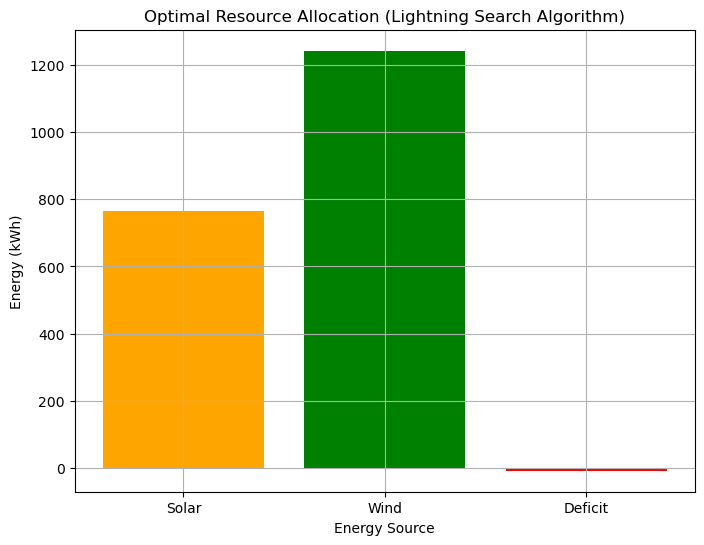

Optimal Resource Allocation (Lightning Search Algorithm):
Solar Power Generated: 765.66 kWh
Wind Power Generated: 1242.87 kWh
Total Power Generated: 2008.54 kWh
Energy Requirement: 2000 kWh
Deficit: -8.54 kWh
Allocation Source: Combined (Solar & Wind)
Solar Percentage: 38.28%
Wind Percentage: 62.14%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate solar and wind power based on user inputs
def calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar, ensemble_wind):
    # Extract user inputs
    # Calculate solar and wind power using trained ML models
    solar_inputs = np.array([[user_inputs_solar['WindSpeed'], user_inputs_solar['Sunshine'], user_inputs_solar['AirPressure'],
                               user_inputs_solar['Radiation'], user_inputs_solar['AirTemperature'], user_inputs_solar['RelativeAirHumidity'],
                               user_inputs_solar['MONTH'], user_inputs_solar['DAY'], user_inputs_solar['hour']]])
    wind_inputs = np.array([[user_inputs_wind['Wind Speed (m/s)'], user_inputs_wind['Theoretical_Power_Curve (KWh)'],
                              user_inputs_wind['Wind Direction (°)'],user_inputs_wind['MONTH'],
                              user_inputs_wind['DAY'], user_inputs_wind['hour']]])

    # Calculate solar and wind power using trained ML models
    solar_power = ensemble_solar_4.predict(solar_inputs)
    wind_power = ensemble_wind_4.predict(wind_inputs)

    return solar_power, wind_power

# Function to determine optimal resource allocation using Lightning Search Algorithm
def allocate_resources(user_energy_requirement, best_position):
    solar_allocated, wind_allocated = best_position
    deficit = user_energy_requirement - (solar_allocated + wind_allocated)
    return 'Combined (Solar & Wind)', deficit, (solar_allocated / user_energy_requirement) * 100, (wind_allocated / user_energy_requirement) * 100

# Objective function for Lightning Search Algorithm
def objective_function(x, user_energy_requirement, solar_power, wind_power):
    solar_allocated, wind_allocated = x
    deficit = user_energy_requirement - (solar_allocated + wind_allocated)
    return deficit ** 2

# Lightning Search Algorithm
def lightning_search_algorithm(objective_function, lb, ub, max_iterations, user_energy_requirement, solar_power, wind_power):
    # Initialize population
    population = np.random.uniform(lb, ub, size=(max_iterations, len(lb)))

    # Iteration loop
    for i in range(max_iterations):
        # Mutation
        mutation_rate = 0.1  # Adjust as needed
        for j in range(len(population[i])):
            if np.random.rand() < mutation_rate:
                population[i, j] = np.random.uniform(lb[j], ub[j])

        # Crossover
        crossover_rate = 0.2  # Adjust as needed
        if np.random.rand() < crossover_rate:
            parent1 = population[np.random.randint(0, max_iterations)]
            parent2 = population[np.random.randint(0, max_iterations)]
            crossover_point = np.random.randint(low=1, high=len(lb))
            child = np.copy(parent1)
            child[crossover_point:] = parent2[crossover_point:]
            population[i] = child

        # Selection
        best_individual_index = np.argmin([objective_function(p, user_energy_requirement, solar_power, wind_power) for p in population])
        best_individual = population[best_individual_index]

    return best_individual

user_inputs_solar = {
    'WindSpeed': 1.5,
    'Sunshine': 1,
    'AirPressure': 1000,
    'Radiation': 90,
    'AirTemperature': 5,
    'RelativeAirHumidity': 94,
    'MONTH': 10,
    'DAY': 11,
    'hour': 12
}
user_inputs_wind = {
    'Wind Speed (m/s)': 1.5,
    'Theoretical_Power_Curve (KWh)': 2000,
    'Wind Direction (°)': 28,
    'MONTH': 10,
    'DAY': 11,
    'hour': 12
}
# Sample energy requirement
user_energy_requirement = 2000  # Sample user input for energy requirement

# Sample solar and wind power
solar_power, wind_power = calculate_power(user_inputs_solar, user_inputs_wind, ensemble_solar_4, ensemble_wind_4)

# Define bounds for solar and wind allocation
lb = [0, 0]
ub = [user_energy_requirement, user_energy_requirement]

# Run Lightning Search Algorithm
best_position = lightning_search_algorithm(objective_function, lb, ub, max_iterations=100, user_energy_requirement=user_energy_requirement, solar_power=solar_power, wind_power=wind_power)

# Extract solar_allocated and wind_allocated from best_position
solar_allocated, wind_allocated = best_position
allocation_source, deficit, solar_percentage, wind_percentage = allocate_resources(user_energy_requirement, best_position)

# Visualize resource allocation
plt.figure(figsize=(8, 6))
labels = ['Solar', 'Wind', 'Deficit']
values = [solar_allocated, wind_allocated, deficit]
colors = ['orange', 'green', 'red']

plt.bar(labels, values, color=colors)
plt.xlabel('Energy Source')
plt.ylabel('Energy (kWh)')
plt.title('Optimal Resource Allocation (Lightning Search Algorithm)')
plt.grid(True)

plt.show()

# Print the optimal resource allocation
print("Optimal Resource Allocation (Lightning Search Algorithm):")
print(f"Solar Power Generated: {solar_allocated:.2f} kWh")
print(f"Wind Power Generated: {wind_allocated:.2f} kWh")
print(f"Total Power Generated: {solar_allocated+wind_allocated:.2f} kWh")
print(f"Energy Requirement: {user_energy_requirement} kWh")
print(f"Deficit: {deficit:.2f} kWh")
print(f"Allocation Source: {allocation_source}")
print(f"Solar Percentage: {solar_percentage:.2f}%")
print(f"Wind Percentage: {wind_percentage:.2f}%")